# <font color="green">Lake Huron fish biomanss analysis: Nearshore and Offshore

<font color="blue"> 
- Excel file has three separate information:
  - fish biomass with specises codes, station codes with latitude and logitude where fishes are caught, and depths from where        fishes are caught, and dates at which fishes are caught
  - metadata for station code
  - metadata for fish species codes    

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.set_option("display.max_columns", 100)
# Setup Seaborn
sns.set_style("whitegrid")
# sns.set_context("poster") # poster

### <font color="blue"> Read excel file as a whole

In [2]:
data_xls = pd.ExcelFile("./J_He_Willie_06_05_2019.xlsx")
print(data_xls.sheet_names)
# all_files = glob.glob("Yr_wise*.csv")

['Data', 'Read me']


In [3]:
df_main = data_xls.parse("Data")

In [4]:
df_main.head(3)

,SURVEY,LiftID,DATE,Region,STATION,LAT_DEG,LAT_MIN,LON_DEG,LON_MIN,SET_D1(ft),SET_D2(ft),NET_L(ft),NET_CODE,SPECIES,totalN,totalW (kg)
0,LT1,2503,1970-06-02,N,1110,45.0,47.8,84.0,39.7,98,250,4000,104.0,902,2,0.450
1,LT1,2503,1970-06-02,N,1110,45.0,47.8,84.0,39.7,98,250,4000,104.0,106,3,0.450
2,LT1,2503,1970-06-02,N,1110,45.0,47.8,84.0,39.7,98,250,4000,104.0,212,4,2.406


In [5]:
df_main.shape

(4873, 16)

In [6]:
df_main.columns

Index(['SURVEY', 'LiftID', 'DATE', 'Region', 'STATION', 'LAT_DEG', 'LAT_MIN',
       'LON_DEG', 'LON_MIN', 'SET_D1(ft)', 'SET_D2(ft)', 'NET_L(ft)',
       'NET_CODE', 'SPECIES', 'totalN', 'totalW (kg)'],
      dtype='object')

### <font color="blue"> Dataframe: df_location_name. Read the sheet "Read me" and save "location names" as a dataframe

In [7]:
df_location_name = data_xls.parse("Read me", usecols="I:L", skiprows=1)

In [8]:
df_location_name.head(3)

,code,total N,GRID,LOCATION
0,1100,20839.0,504.0,Hammond Bay to Nine Miles Point
1,1040,16226.0,1210.0,AuSable Point
2,1031,15118.0,1413.0,Grind Stone City to Lighthouse County Park


### <font color="blue"> Dataframe: df_fish_name. Save fish names from "Read me" as a dataframe

In [9]:
df_fish_name = data_xls.parse("Read me", usecols="A:D", skiprows=1)

In [10]:
df_fish_name.head(3)

,Code,total N,BRIEF,NAME
0,307,44169,LAT,Lake trout
1,203,12100,LWF,Lake whitefish
2,109,10589,smelt,Rainbow smelt


In [11]:
df_fish_name.tail(3)

,Code,total N,BRIEF,NAME
43,418,1,RHS,Redhorse Sucker
44,802,1,Sau,Sauger
45,Total,110969,NaN,NaN


In [12]:
df_fish_name = df_fish_name.drop(index=45)

In [13]:
df_fish_name.shape

(45, 4)

### There are 45 unique species

In [14]:
df_fish_name.Code.nunique()

45

### df_nearshore : SET_D1(ft) is less than 100 ft

In [15]:
df_nearshore = df_main[df_main['SET_D1(ft)']<=100]

### df_offshore: SET_D2(ft) is more than 100 ft

In [16]:
df_offshore = df_main[df_main['SET_D1(ft)']>100]

In [17]:
df_nearshore.shape, df_offshore.shape

((3996, 16), (877, 16))

# Nearshore Analysis

In [18]:
df_nearshore.head(3)

,SURVEY,LiftID,DATE,Region,STATION,LAT_DEG,LAT_MIN,LON_DEG,LON_MIN,SET_D1(ft),SET_D2(ft),NET_L(ft),NET_CODE,SPECIES,totalN,totalW (kg)
0,LT1,2503,1970-06-02,N,1110,45.0,47.8,84.0,39.7,98,250,4000,104.0,902,2,0.450
1,LT1,2503,1970-06-02,N,1110,45.0,47.8,84.0,39.7,98,250,4000,104.0,106,3,0.450
2,LT1,2503,1970-06-02,N,1110,45.0,47.8,84.0,39.7,98,250,4000,104.0,212,4,2.406


In [19]:
df_nearshore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 4869
Data columns (total 16 columns):
SURVEY         3996 non-null object
LiftID         3996 non-null int64
DATE           3996 non-null datetime64[ns]
Region         3996 non-null object
STATION        3996 non-null int64
LAT_DEG        3966 non-null float64
LAT_MIN        3966 non-null float64
LON_DEG        3966 non-null float64
LON_MIN        3966 non-null float64
SET_D1(ft)     3996 non-null int64
SET_D2(ft)     3996 non-null int64
NET_L(ft)      3996 non-null int64
NET_CODE       3992 non-null float64
SPECIES        3996 non-null int64
totalN         3996 non-null int64
totalW (kg)    3918 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(7), object(2)
memory usage: 530.7+ KB


### There are 78 missing values in totalW (kg) column 

In [20]:
df_nearshore[df_nearshore['totalW (kg)'].isnull()].shape

(78, 16)

### See where are these missing values

In [21]:
df_nearshore[df_nearshore['totalW (kg)'].isnull()].head()

,SURVEY,LiftID,DATE,Region,STATION,LAT_DEG,LAT_MIN,LON_DEG,LON_MIN,SET_D1(ft),SET_D2(ft),NET_L(ft),NET_CODE,SPECIES,totalN,totalW (kg)
191,LT1,2768,1976-04-06,S,1050,44.0,42.00,83.0,14.17,15,42,9900,101.0,801,2,NaN
1055,LT1,4649,1984-05-14,S,1010,43.0,25.50,82.0,31.30,36,68,9900,101.0,101,1,NaN
1193,LT1,4930,1985-05-22,S,1010,43.0,25.50,82.0,31.30,36,70,9900,101.0,101,1,NaN
1290,LT1,4941,1985-06-20,N,1114,45.0,54.90,84.0,41.90,36,111,9900,101.0,301,1,NaN
2290,LT1,775,1996-05-15,S,1031,44.0,5.63,82.0,49.05,80,92,1800,101.0,106,3,NaN


### Drop these 78 values from the analysis

In [22]:
df_nearshore_v1 = df_nearshore.dropna(subset=["totalW (kg)"], axis=0)

In [23]:
df_nearshore_v1.shape

(3918, 16)

### There are 31 nearshore stations and 43 species in df_nearshore_v1

In [24]:
df_nearshore_v1.STATION.nunique(), df_nearshore_v1.SPECIES.nunique()

(31, 43)

### Gropu by nearshore data by these stations

In [25]:
nearshore_grpby_station = df_nearshore_v1.groupby(['STATION', 'SPECIES'])

In [26]:
# for idx, values in nearshore_grpby_station:
#     print(idx)

In [27]:
series_nearshore_grpby_station = nearshore_grpby_station['totalW (kg)'].sum(axis=1)

In [28]:
series_nearshore_grpby_station.head(20)

STATION  SPECIES
1010     101          2.400000
         106         11.900000
         109          2.670000
         119         12.000000
         127        109.922001
         133          1.200000
         203         36.171000
         212         24.110000
         213         14.180000
         301         58.090000
         307        985.740000
         310         14.140000
         405          5.100000
         801        317.250000
         802          0.450000
         803          8.505000
1020     106          3.040000
         108          0.350000
         109          0.090000
         119          3.120000
Name: totalW (kg), dtype: float64

In [29]:
df_nearshore_grpby_station = series_nearshore_grpby_station.unstack()

In [30]:
df_nearshore_grpby_station.head()

SPECIES,5,101,106,108,109,113,118,119,127,130,132,133,134,202,203,204,212,213,215,301,303,304,305,307,310,314,325,402,404,405,406,410,413,414,418,519,601,607,801,802,803,902,906
STATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010,NaN,2.4,11.90,NaN,2.67,NaN,NaN,12.00,109.922001,NaN,NaN,1.2,NaN,NaN,36.171000,NaN,24.11,14.18,NaN,58.09,NaN,NaN,NaN,985.740,14.14,NaN,NaN,NaN,NaN,5.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.250000,0.45,8.505,NaN,NaN
1020,NaN,NaN,3.04,0.35,0.09,NaN,NaN,3.12,81.540000,NaN,0.43,NaN,NaN,NaN,145.780000,NaN,26.24,NaN,NaN,15.66,NaN,NaN,NaN,2278.850,NaN,NaN,NaN,NaN,0.520000,38.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,90.860000,NaN,41.640,NaN,NaN
1021,NaN,NaN,3.67,NaN,0.06,NaN,NaN,0.89,362.393999,NaN,0.45,NaN,NaN,NaN,107.090000,NaN,17.40,NaN,NaN,4.32,NaN,NaN,NaN,3574.361,NaN,NaN,NaN,NaN,14.160000,11.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.130000,NaN,53.254,NaN,NaN
1030,NaN,NaN,1.80,NaN,0.20,NaN,NaN,1.90,152.590000,NaN,NaN,NaN,NaN,NaN,166.240002,NaN,8.50,1.82,NaN,12.05,NaN,NaN,NaN,1670.390,NaN,NaN,NaN,NaN,12.530000,1.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.990000,NaN,32.370,NaN,NaN
1031,NaN,NaN,38.36,NaN,3.48,NaN,NaN,1.85,911.583998,NaN,NaN,2.0,NaN,NaN,592.538999,0.56,87.51,18.15,NaN,41.86,NaN,NaN,NaN,17461.320,NaN,NaN,3.83,NaN,206.892002,102.440001,NaN,NaN,1.0,NaN,1.268,NaN,0.24,7.28,580.610012,NaN,68.850,NaN,NaN


In [31]:
df_nearshore_grpby_station.describe()

SPECIES,5,101,106,108,109,113,118,119,127,130,132,133,134,202,203,204,212,213,215,301,303,304,305,307,310,314,325,402,404,405,406,410,413,414,418,519,601,607,801,802,803,902,906
count,10.000000,4.000000,19.000000,2.000000,22.000000,3.000000,1.0,10.000000,30.000000,1.00,2.000000,5.000000,1.00,12.000000,29.000000,7.000000,28.000000,12.000000,1.00,18.000000,5.000000,2.000000,8.000000,31.000000,1.00,3.000000,10.000000,1.00,29.000000,20.000000,1.000000,1.00,2.000000,1.00,1.000,1.00,6.000000,3.000000,18.000000,1.00,19.000000,3.000000,2.000000
mean,0.503400,2.699750,9.466316,0.295000,9.758091,25.834000,0.3,2.771700,172.716100,0.01,0.440000,1.242000,0.45,89.778000,329.817225,7.004286,145.645286,129.546500,0.53,25.031333,5.363800,1.450000,10.927500,2375.307179,14.14,2.481667,87.752500,6.36,134.311655,40.612600,37.400001,1.02,0.825000,1.53,1.268,0.45,0.604333,3.033333,73.212278,0.45,34.219895,0.433333,0.074000
std,0.532571,2.737175,13.836952,0.077782,14.910501,28.637792,NaN,3.366356,266.169163,NaN,0.014142,0.551425,NaN,194.014193,662.794695,17.193241,238.896076,292.912521,NaN,25.706448,2.779767,0.183848,9.057365,4039.262879,NaN,2.461894,96.575118,NaN,288.409872,70.371797,NaN,NaN,0.247487,NaN,NaN,NaN,0.422896,3.680385,146.898795,NaN,47.733249,0.404145,0.093338
min,0.010000,0.454000,0.010000,0.240000,0.010000,1.090000,0.3,0.450000,1.180000,0.01,0.430000,0.450000,0.45,0.400000,1.570000,0.110000,0.720000,0.300000,0.53,0.499000,3.450000,1.320000,0.680000,3.269000,14.14,0.454000,1.680000,6.36,0.490000,0.634000,37.400001,1.02,0.650000,1.53,1.268,0.45,0.146000,0.770000,0.160000,0.45,0.227000,0.200000,0.008000
25%,0.136250,1.101250,0.915000,0.267500,0.364750,10.149000,0.3,1.130000,14.139000,0.01,0.435000,1.200000,0.45,1.115000,15.620000,0.190000,15.359250,4.472750,0.53,2.916750,3.710000,1.385000,3.988750,117.735500,14.14,1.112000,4.902750,6.36,12.530000,4.080000,37.400001,1.02,0.737500,1.53,1.268,0.45,0.292500,0.910000,4.552500,0.45,4.528500,0.200000,0.041000
50%,0.325000,1.858500,3.670000,0.295000,2.105000,19.208000,0.3,1.903500,69.820000,0.01,0.440000,1.210000,0.45,3.221500,107.090000,0.500000,54.062000,16.651000,0.53,12.505000,4.177000,1.450000,7.899500,288.604000,14.14,1.770000,55.072000,6.36,27.927000,13.745000,37.400001,1.02,0.825000,1.53,1.268,0.45,0.575000,1.050000,16.657000,0.45,21.000000,0.200000,0.074000
75%,0.641500,3.457000,9.750000,0.322500,16.415000,38.206000,0.3,2.677500,186.100250,0.01,0.445000,1.350000,0.45,17.300500,424.219999,1.030000,138.918250,83.005250,0.53,45.575500,5.312000,1.515000,18.042000,2892.136500,14.14,3.495500,145.438000,6.36,103.128000,50.894500,37.400001,1.02,0.912500,1.53,1.268,0.45,0.767500,4.165000,52.136750,0.45,47.154500,0.550000,0.107000
max,1.613000,6.628000,46.700001,0.350000,47.710000,57.203999,0.3,12.000000,1066.310015,0.01,0.450000,2.000000,0.45,520.019997,3440.216987,45.979999,942.446999,1024.469006,0.53,73.560000,10.170000,1.580000,25.042000,17461.320000,14.14,5.221000,279.116000,6.36,1213.119004,310.434002,37.400001,1.02,1.000000,1.53,1.268,0.45,1.300000,7.280000,580.610012,0.45,209.250000,0.900000,0.140000


### Number of missing values (species-wise). There are 43 unique speices.

In [32]:
df_nearshore_grpby_station.isna().sum(axis=0)

SPECIES
5      21
101    27
106    12
108    29
109     9
113    28
118    30
119    21
127     1
130    30
132    29
133    26
134    30
202    19
203     2
204    24
212     3
213    19
215    30
301    13
303    26
304    29
305    23
307     0
310    30
314    28
325    21
402    30
404     2
405    11
406    30
410    30
413    29
414    30
418    30
519    30
601    25
607    28
801    13
802    30
803    12
902    28
906    29
dtype: int64

In [33]:
more_20_zeros = df_nearshore_grpby_station.isna().sum(axis=0) >= 20

In [34]:
sum(more_20_zeros==True)

30

In [35]:
less_than_10_zeros = df_nearshore_grpby_station.isna().sum(axis=0) <= 10

In [36]:
sum(less_than_10_zeros==True)

6

In [37]:
bet_11_19 = (df_nearshore_grpby_station.isna().sum(axis=0) > 10) &  (df_nearshore_grpby_station.isna().sum(axis=0) < 20)

In [38]:
sum(bet_11_19==True)

7

In [39]:
more_20_zeros

SPECIES
5       True
101     True
106    False
108     True
109    False
113     True
118     True
119     True
127    False
130     True
132     True
133     True
134     True
202    False
203    False
204     True
212    False
213    False
215     True
301    False
303     True
304     True
305     True
307    False
310     True
314     True
325     True
402     True
404    False
405    False
406     True
410     True
413     True
414     True
418     True
519     True
601     True
607     True
801    False
802     True
803    False
902     True
906     True
dtype: bool

In [40]:
unique_species = df_nearshore_v1.SPECIES.unique()
unique_species = np.sort(unique_species)
print(unique_species)

[  5 101 106 108 109 113 118 119 127 130 132 133 134 202 203 204 212 213
 215 301 303 304 305 307 310 314 325 402 404 405 406 410 413 414 418 519
 601 607 801 802 803 902 906]


In [41]:
# df_fish_name[more_20_zeros]

In [42]:
species_with_less_counts = unique_species[more_20_zeros==True]

## Following 30 species have 20 or more missing values

In [43]:
species_with_less_counts

array([  5, 101, 108, 113, 118, 119, 130, 132, 133, 134, 204, 215, 303,
       304, 305, 310, 314, 325, 402, 406, 410, 413, 414, 418, 519, 601,
       607, 802, 902, 906], dtype=int64)

### See their names

In [44]:
df_fish_name.loc[df_fish_name['Code'].isin(species_with_less_counts)]

,Code,total N,BRIEF,NAME
11,325,773,BAC,Backcross (splake X laker)
12,204,402,BLO,Bloater
14,406,275,LCS,Lake Chubsucker
16,305,46,BRN,Brown trout
17,5,43,SLP,Sea Lamprey
18,113,39,NPK,Northern pike
19,119,19,CCT,Channel catfish
20,601,19,Roc,Rock bass
21,607,15,Sma,Smallmouth bass
23,310,13,Coh,Coho


In [45]:
df_nearshore_grpby_station[species_with_less_counts].head(3)

SPECIES,5,101,108,113,118,119,130,132,133,134,204,215,303,304,305,310,314,325,402,406,410,413,414,418,519,601,607,802,902,906
STATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010,NaN,2.4,NaN,NaN,NaN,12.00,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,14.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN
1020,NaN,NaN,0.35,NaN,NaN,3.12,NaN,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,0.89,NaN,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_nearshore_grpby_station[species_with_less_counts].describe()

SPECIES,5,101,108,113,118,119,130,132,133,134,204,215,303,304,305,310,314,325,402,406,410,413,414,418,519,601,607,802,902,906
count,10.000000,4.000000,2.000000,3.000000,1.0,10.000000,1.00,2.000000,5.000000,1.00,7.000000,1.00,5.000000,2.000000,8.000000,1.00,3.000000,10.000000,1.00,1.000000,1.00,2.000000,1.00,1.000,1.00,6.000000,3.000000,1.00,3.000000,2.000000
mean,0.503400,2.699750,0.295000,25.834000,0.3,2.771700,0.01,0.440000,1.242000,0.45,7.004286,0.53,5.363800,1.450000,10.927500,14.14,2.481667,87.752500,6.36,37.400001,1.02,0.825000,1.53,1.268,0.45,0.604333,3.033333,0.45,0.433333,0.074000
std,0.532571,2.737175,0.077782,28.637792,NaN,3.366356,NaN,0.014142,0.551425,NaN,17.193241,NaN,2.779767,0.183848,9.057365,NaN,2.461894,96.575118,NaN,NaN,NaN,0.247487,NaN,NaN,NaN,0.422896,3.680385,NaN,0.404145,0.093338
min,0.010000,0.454000,0.240000,1.090000,0.3,0.450000,0.01,0.430000,0.450000,0.45,0.110000,0.53,3.450000,1.320000,0.680000,14.14,0.454000,1.680000,6.36,37.400001,1.02,0.650000,1.53,1.268,0.45,0.146000,0.770000,0.45,0.200000,0.008000
25%,0.136250,1.101250,0.267500,10.149000,0.3,1.130000,0.01,0.435000,1.200000,0.45,0.190000,0.53,3.710000,1.385000,3.988750,14.14,1.112000,4.902750,6.36,37.400001,1.02,0.737500,1.53,1.268,0.45,0.292500,0.910000,0.45,0.200000,0.041000
50%,0.325000,1.858500,0.295000,19.208000,0.3,1.903500,0.01,0.440000,1.210000,0.45,0.500000,0.53,4.177000,1.450000,7.899500,14.14,1.770000,55.072000,6.36,37.400001,1.02,0.825000,1.53,1.268,0.45,0.575000,1.050000,0.45,0.200000,0.074000
75%,0.641500,3.457000,0.322500,38.206000,0.3,2.677500,0.01,0.445000,1.350000,0.45,1.030000,0.53,5.312000,1.515000,18.042000,14.14,3.495500,145.438000,6.36,37.400001,1.02,0.912500,1.53,1.268,0.45,0.767500,4.165000,0.45,0.550000,0.107000
max,1.613000,6.628000,0.350000,57.203999,0.3,12.000000,0.01,0.450000,2.000000,0.45,45.979999,0.53,10.170000,1.580000,25.042000,14.14,5.221000,279.116000,6.36,37.400001,1.02,1.000000,1.53,1.268,0.45,1.300000,7.280000,0.45,0.900000,0.140000


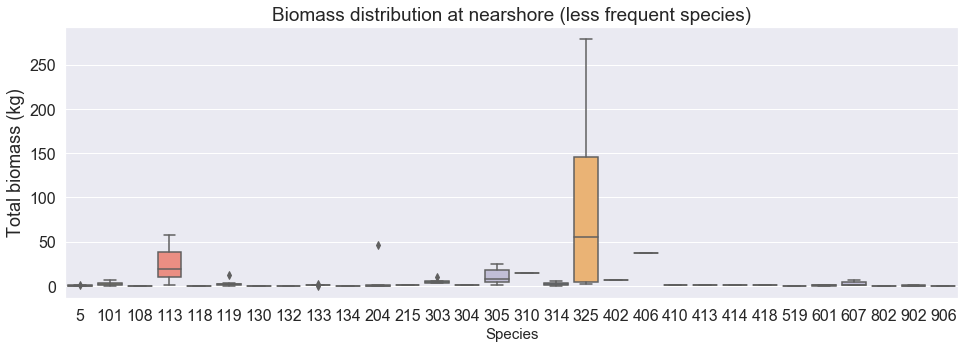

In [47]:
sns.set()
fig, ax1 = plt.subplots(figsize=(16,5))
ax1.tick_params(labelsize=16)

sns.boxplot(data=df_nearshore_grpby_station[species_with_less_counts],  orient='v', palette='Set3',  ax=ax1) # palette='Set3',
# plt.yscale('log')
plt.ylabel("Total biomass (kg)", fontsize=18)
plt.xlabel("Species", fontsize=15)
plt.title('Biomass distribution at nearshore (less frequent species)', fontsize=19)
plt.show()

## Following 6 species have less than 10 missing values 

In [48]:
species_with_more_counts = unique_species[less_than_10_zeros == True]

#### See species codes

In [49]:
species_with_more_counts

array([109, 127, 203, 212, 307, 404], dtype=int64)

In [50]:
df_nearshore_station_wise_species= df_nearshore_grpby_station[species_with_more_counts]

#### See species names

In [51]:
df_fish_name.loc[df_fish_name['Code'].isin(species_with_more_counts)]

,Code,total N,BRIEF,NAME
0,307,44169,LAT,Lake trout
1,203,12100,LWF,Lake whitefish
2,109,10589,smelt,Rainbow smelt
3,212,9132,Rou,Round whitefish
5,404,6862,LNS,Longnose sucker
8,127,3872,BBT,Burbot


In [52]:
df_nearshore_station_wise_species.describe()

SPECIES,109,127,203,212,307,404
count,22.000000,30.000000,29.000000,28.000000,31.000000,29.000000
mean,9.758091,172.716100,329.817225,145.645286,2375.307179,134.311655
std,14.910501,266.169163,662.794695,238.896076,4039.262879,288.409872
min,0.010000,1.180000,1.570000,0.720000,3.269000,0.490000
25%,0.364750,14.139000,15.620000,15.359250,117.735500,12.530000
50%,2.105000,69.820000,107.090000,54.062000,288.604000,27.927000
75%,16.415000,186.100250,424.219999,138.918250,2892.136500,103.128000
max,47.710000,1066.310015,3440.216987,942.446999,17461.320000,1213.119004


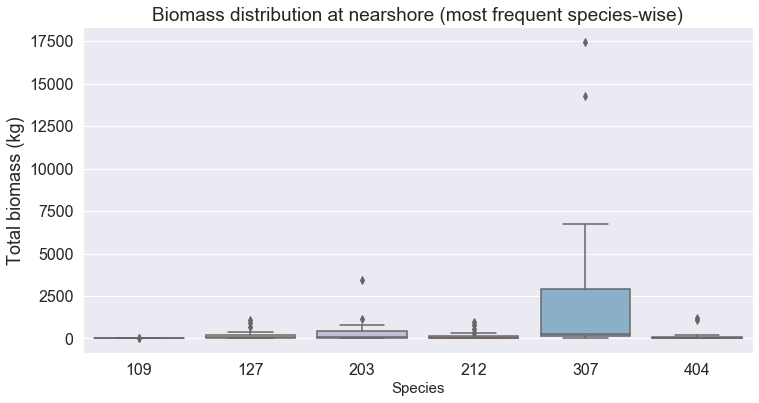

In [53]:
sns.set()
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.tick_params(labelsize=16)

sns.boxplot(data=df_nearshore_station_wise_species,  orient='v', palette='Set3',  ax=ax1) # palette='Set3',
# plt.yscale('log')
plt.ylabel("Total biomass (kg)", fontsize=18)
plt.xlabel("Species", fontsize=15)
plt.title('Biomass distribution at nearshore (most frequent species-wise)', fontsize=19)
plt.show()

In [54]:
species_with_intermediate_counts = unique_species[bet_11_19 == True]
print(species_with_intermediate_counts)

[106 202 213 301 405 801 803]


In [55]:
df_nearshore_grpby_station[species_with_intermediate_counts].describe()

SPECIES,106,202,213,301,405,801,803
count,19.000000,12.000000,12.000000,18.000000,20.000000,18.000000,19.000000
mean,9.466316,89.778000,129.546500,25.031333,40.612600,73.212278,34.219895
std,13.836952,194.014193,292.912521,25.706448,70.371797,146.898795,47.733249
min,0.010000,0.400000,0.300000,0.499000,0.634000,0.160000,0.227000
25%,0.915000,1.115000,4.472750,2.916750,4.080000,4.552500,4.528500
50%,3.670000,3.221500,16.651000,12.505000,13.745000,16.657000,21.000000
75%,9.750000,17.300500,83.005250,45.575500,50.894500,52.136750,47.154500
max,46.700001,520.019997,1024.469006,73.560000,310.434002,580.610012,209.250000


### Species with intermediate frequencies and their names

In [56]:
df_fish_name.loc[df_fish_name.Code.isin(species_with_intermediate_counts)]

,Code,total N,BRIEF,NAME
4,213,8344,CHB,Unid. chubs
6,801,5059,YCP,Yellow perch
7,106,4615,ALE,Alewife
9,202,2522,CSC,Cisco
10,405,1315,WHS,White sucker
13,803,393,WAE,Walleye
15,301,255,CHS,Chinook salmon


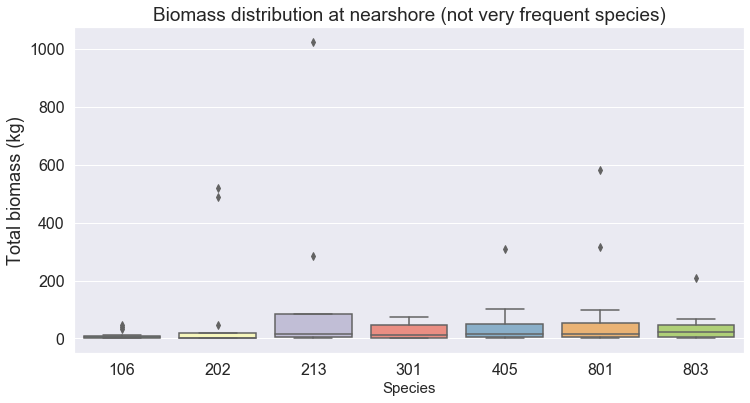

In [57]:
sns.set()
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.tick_params(labelsize=16)

sns.boxplot(data=df_nearshore_grpby_station[species_with_intermediate_counts],  orient='v', palette='Set3',  ax=ax1) # palette='Set3',
# plt.yscale('log')
plt.ylabel("Total biomass (kg)", fontsize=18)
plt.xlabel("Species", fontsize=15)
plt.title('Biomass distribution at nearshore (not very frequent species)', fontsize=19)
plt.show()

### Nearshore: Station and speices wise fish biomass 

In [58]:
series = df_location_name[df_location_name.code==1010].LOCATION

In [59]:
series= series.reset_index(drop=True)

In [60]:
loc_name = series.loc[0]
loc_name

'Port Sanilac'

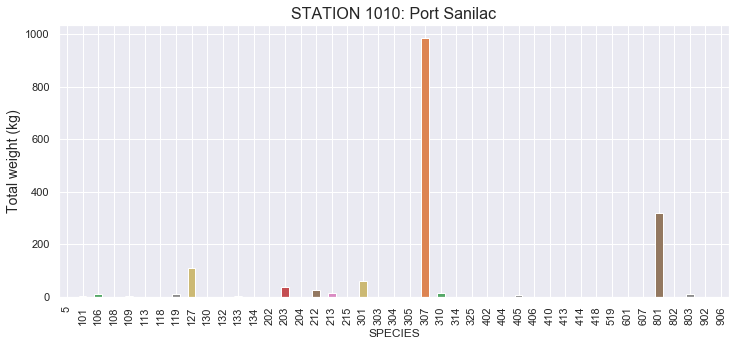

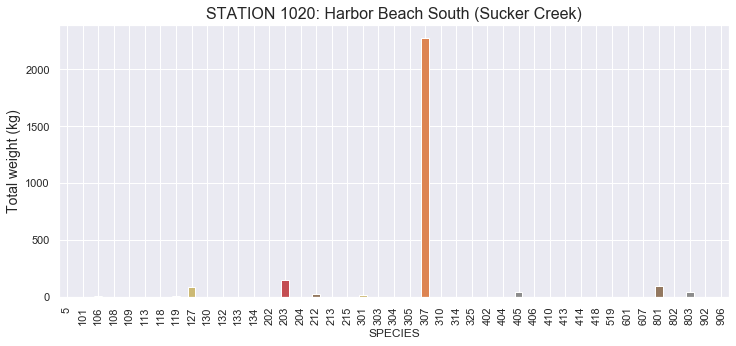

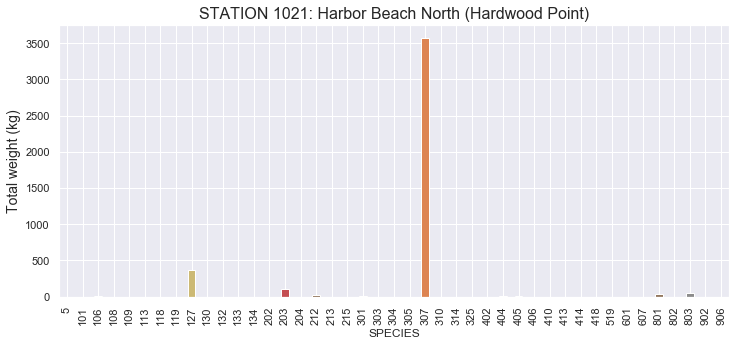

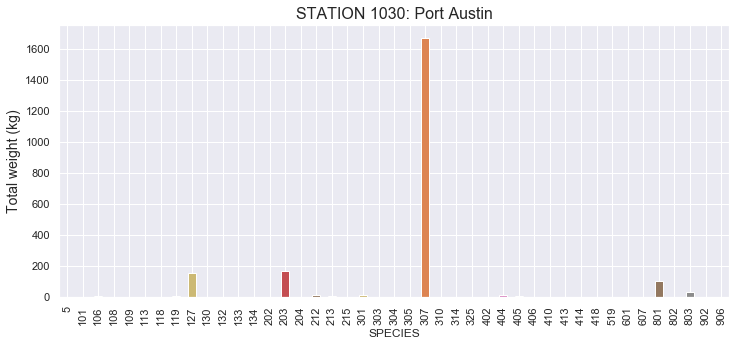

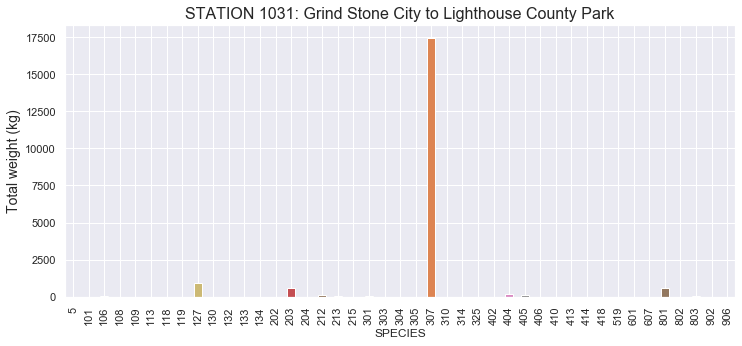

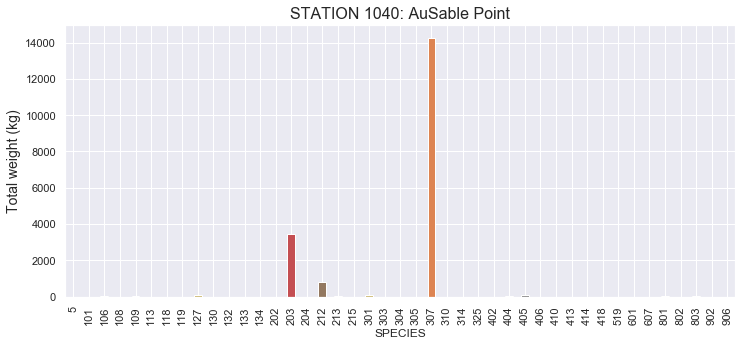

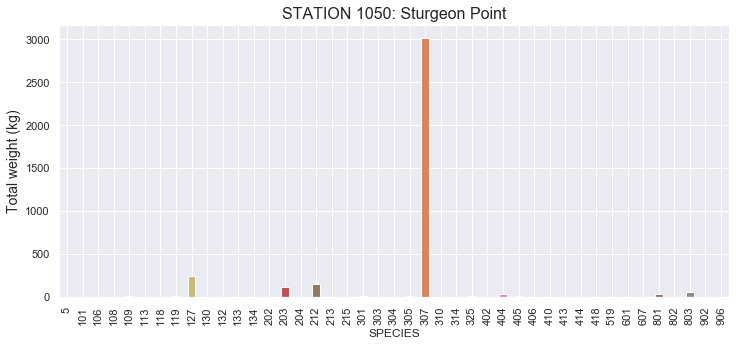

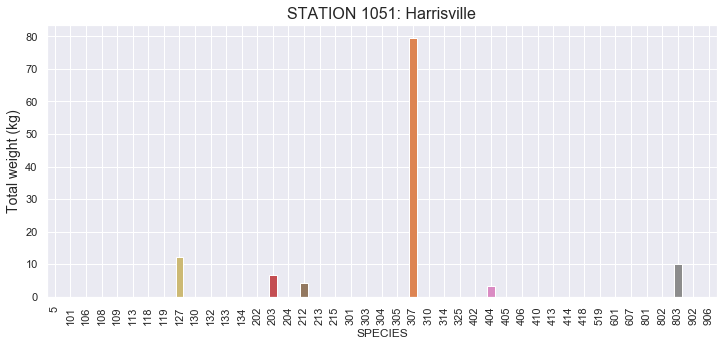

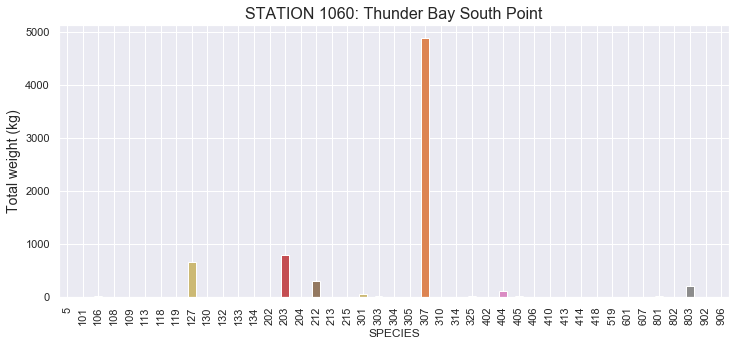

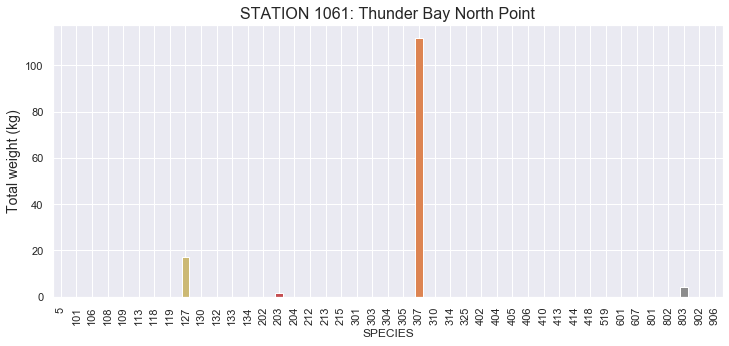

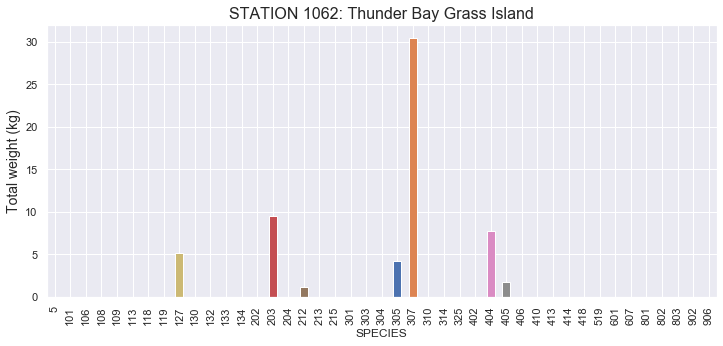

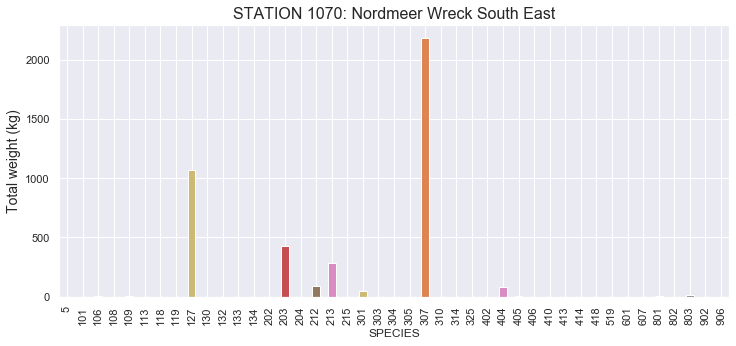

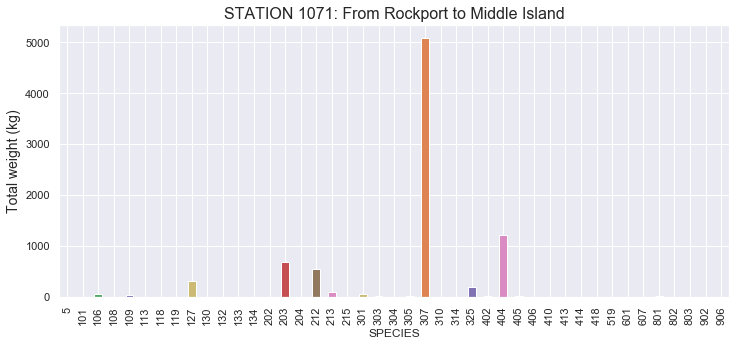

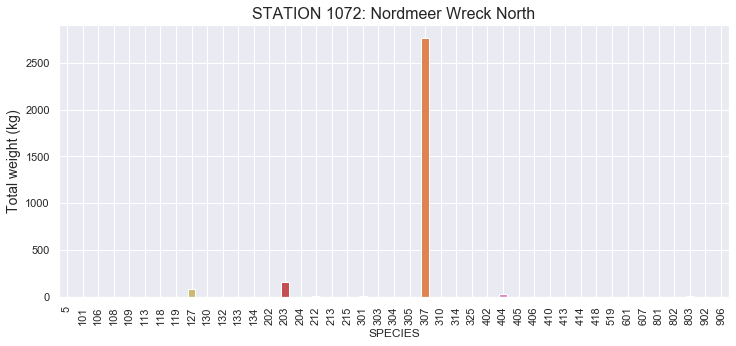

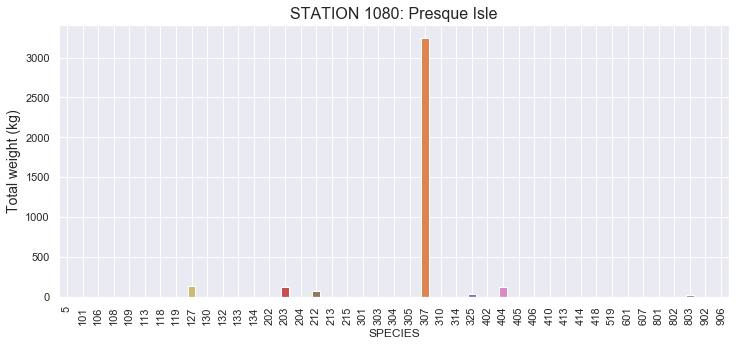

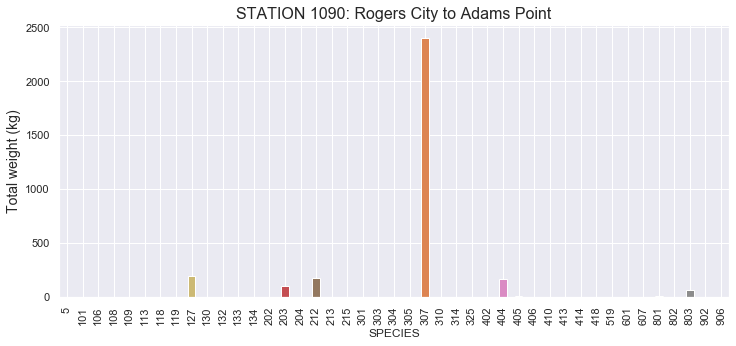

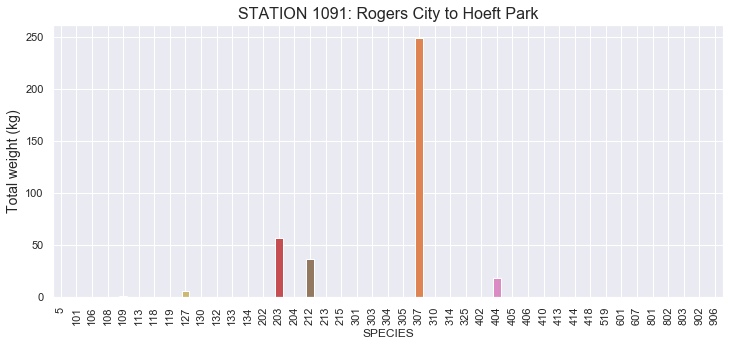

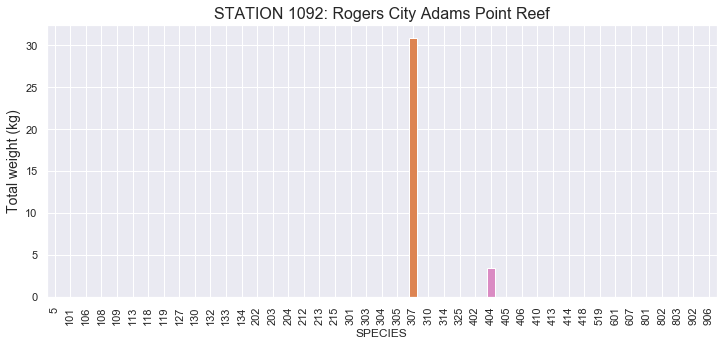

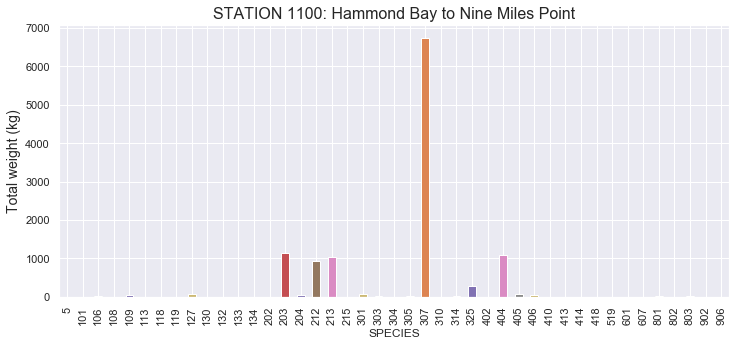

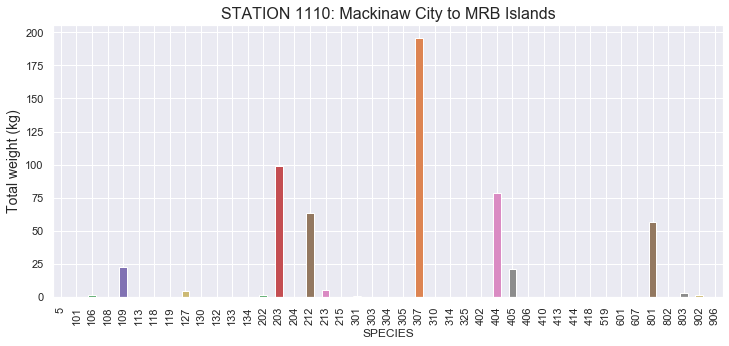

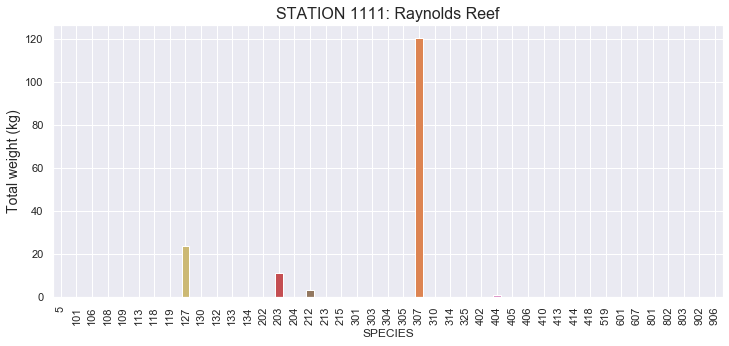

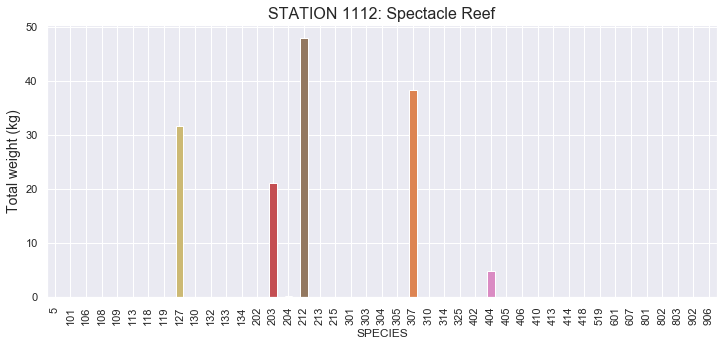

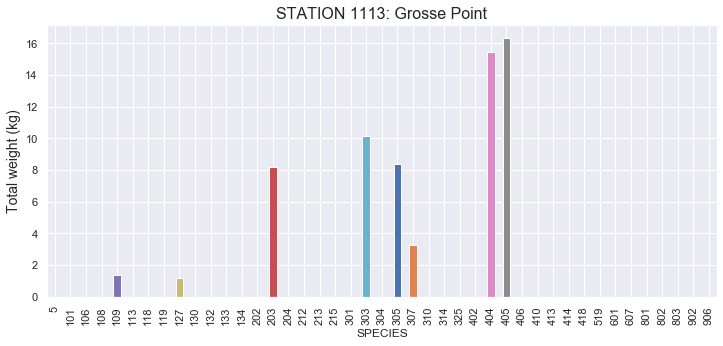

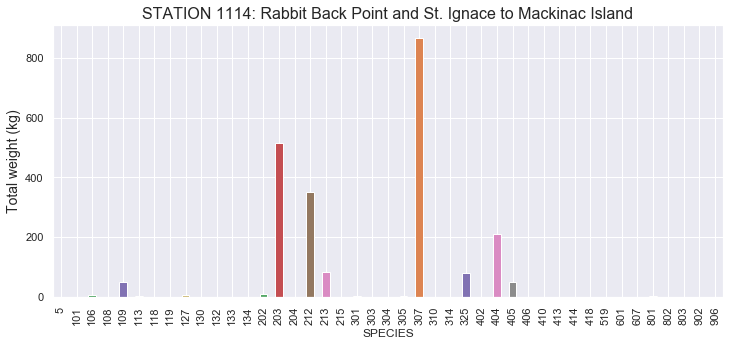

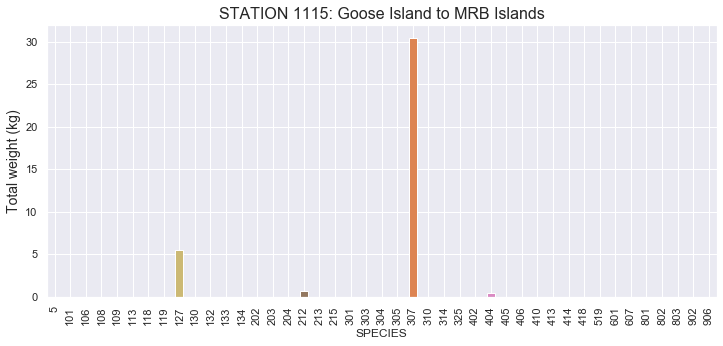

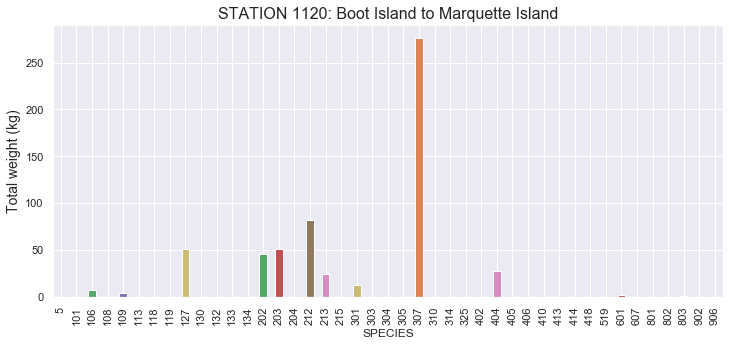

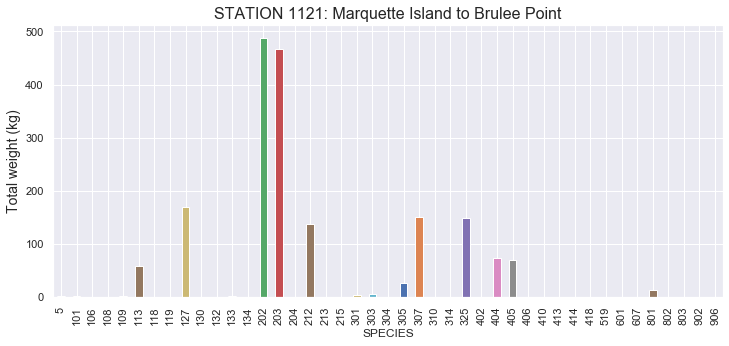

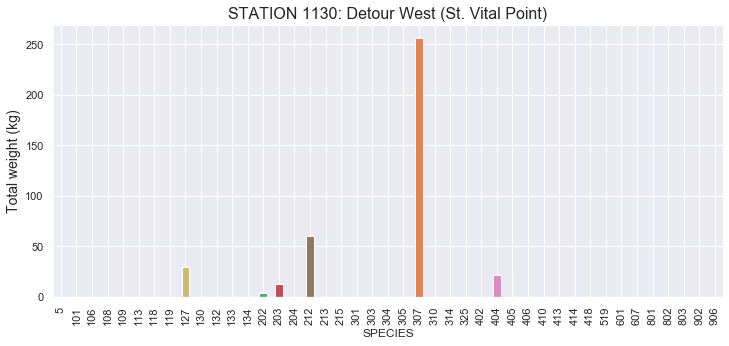

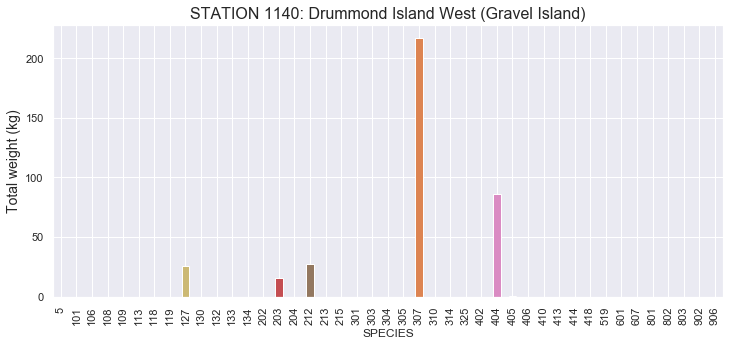

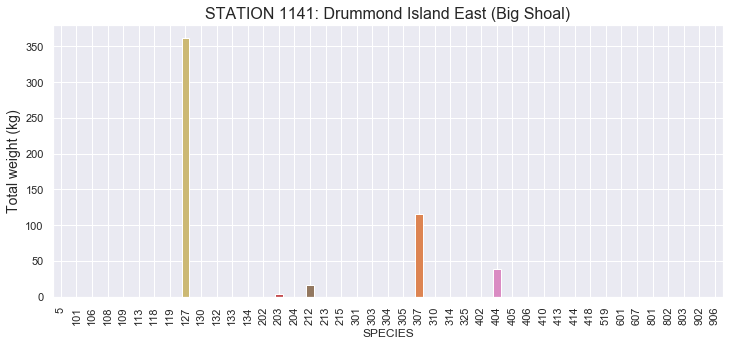

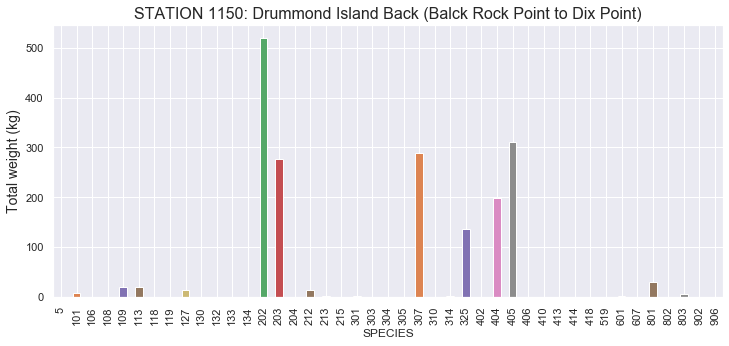

In [61]:
for stations in df_nearshore_grpby_station.index:
    df_nearshore_grpby_station.loc[stations].plot(kind='bar', figsize=(12,5))
    loc_name_series = df_location_name[df_location_name.code==stations].LOCATION
    loc_name_series = loc_name_series.reset_index(drop=True)
    loc_name = loc_name_series.loc[0]
    plt.ylabel("Total weight (kg)", fontsize=14)
    plt.title("STATION " + str(stations) + ": " + loc_name, fontsize=16)
    plt.grid(True)
    plt.show()

## Station wise time-series

In [62]:
station_wise_time_series_counts = df_nearshore_v1.groupby(['STATION'])['DATE'].size()

In [63]:
station_wise_time_series_counts

STATION
1010     94
1020    159
1021    173
1030     62
1031    331
1040    443
1050    196
1051     15
1060    252
1061     12
1062      7
1070    147
1071    269
1072     76
1080    169
1090    151
1091     15
1092      4
1100    540
1110     94
1111     23
1112     30
1113      8
1114    211
1115     10
1120     80
1121     84
1130     54
1140     53
1141     42
1150    114
Name: DATE, dtype: int64

In [64]:
df_nearshore_v1.groupby(['STATION'])['DATE'].value_counts().tail(150)

STATION  DATE      
1100     1994-06-17     9
         1998-06-16     9
         1998-06-17     9
         2018-05-24     9
         1977-04-21     8
         1977-04-25     8
         1979-06-18     8
         1980-06-17     8
         1981-06-11     8
         1981-06-15     8
         1983-06-13     8
         1983-06-14     8
         1984-06-12     8
         1985-06-17     8
         1991-06-26     8
         1993-06-21     8
         1993-06-22     8
         1994-06-16     8
         1995-06-26     8
         1996-07-01     8
         2013-05-07     8
         2016-05-09     8
         1974-04-30     7
         1979-06-19     7
         1980-06-16     7
         1988-06-23     7
         1995-06-27     7
         2011-05-05     7
         2015-05-07     7
         2017-05-30     7
                       ..
1130     2018-05-31     6
         2011-05-11     5
         2012-04-30     5
         2010-05-05     4
1140     2014-05-22    10
         2010-05-04     9
         2012-04-2

In [65]:
stations = df_nearshore_v1.STATION.unique()

In [66]:
stations

array([1110, 1113, 1100, 1071, 1114, 1121, 1150, 1050, 1080, 1060, 1040,
       1120, 1010, 1031, 1030, 1070, 1062, 1020, 1021, 1090, 1072, 1091,
       1112, 1061, 1111, 1141, 1140, 1130, 1115, 1051, 1092], dtype=int64)

In [67]:
def station_wise_plot(station_number=None):
    df_name = "df_nearshore_" + str(station_number)
    df_name = df_nearshore_v1[df_nearshore_v1.STATION==station_number]
    grpby_year = df_name.groupby(df_name.DATE.dt.year)
    year_count = grpby_year['totalW (kg)'].size().count()
    
    location_series = df_location_name[df_location_name.code==station_number].LOCATION.reset_index() 
    print("Elments in the time series at "  + location_series['LOCATION'][0] + ": " + str(year_count))
    
    grpby_year['totalW (kg)'].sum().plot(kind='bar', figsize=(14,5))
    
    plt.ylabel('Total biomass (kg)', fontsize=14)
    plt.title("Station " + str(station_number) + ": " + location_series['LOCATION'][0], fontsize=15)
    plt.grid(True)
    plt.show()    

### Plot station-wise biomass time series: for nearshore

Elments in the time series at Mackinaw City to MRB Islands: 10


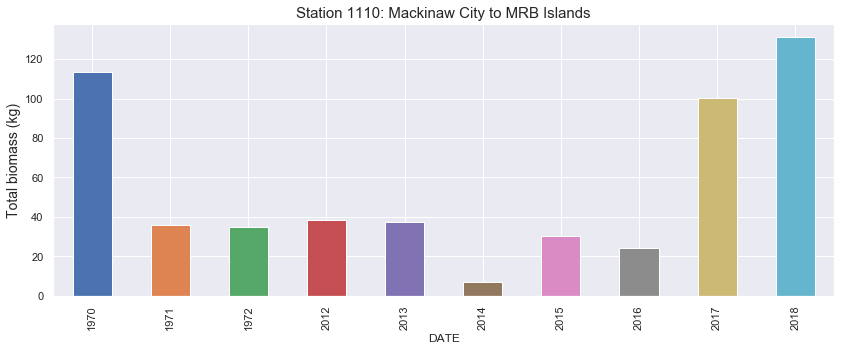

Elments in the time series at Grosse Point: 1


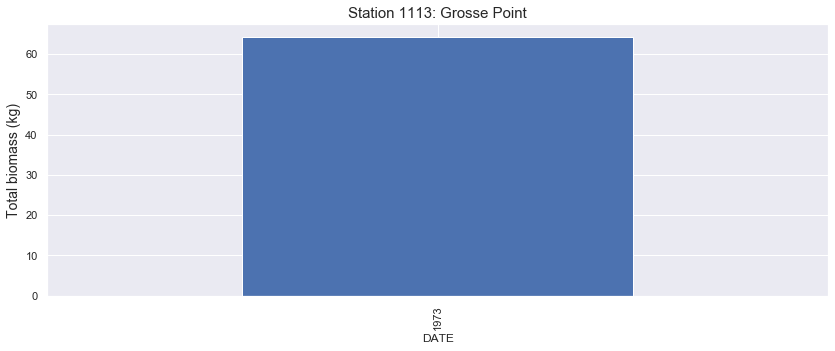

Elments in the time series at Hammond Bay to Nine Miles Point: 44


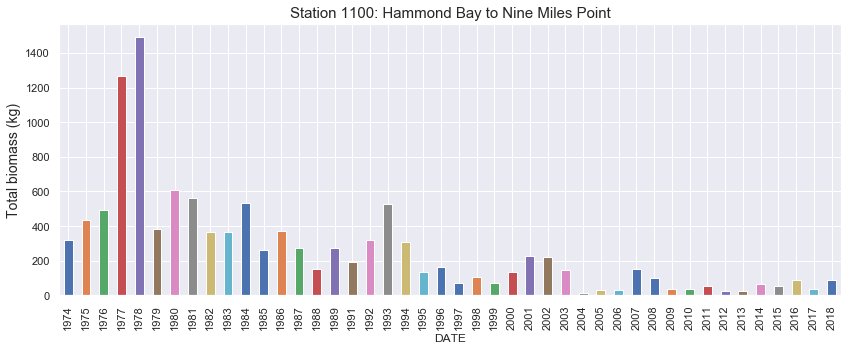

Elments in the time series at From Rockport to Middle Island: 13


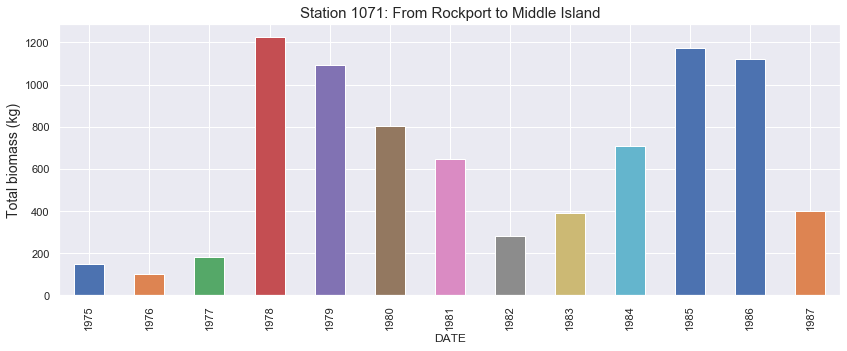

Elments in the time series at Rabbit Back Point and St. Ignace to Mackinac Island: 21


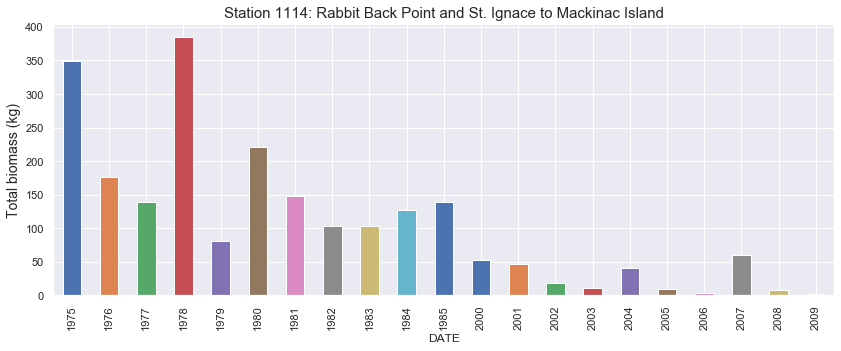

Elments in the time series at Marquette Island to Brulee Point: 5


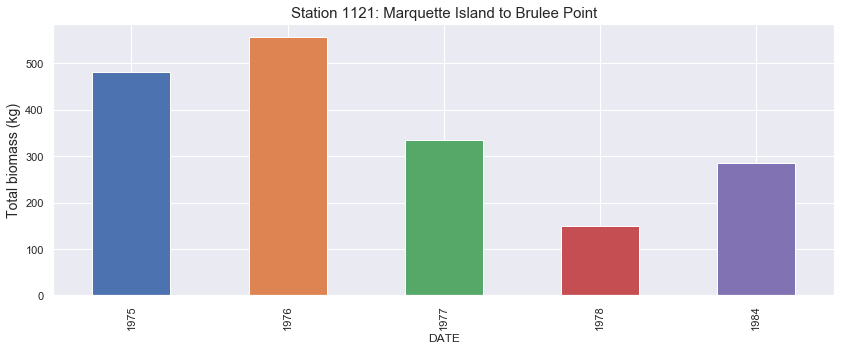

Elments in the time series at Drummond Island Back (Balck Rock Point to Dix Point): 9


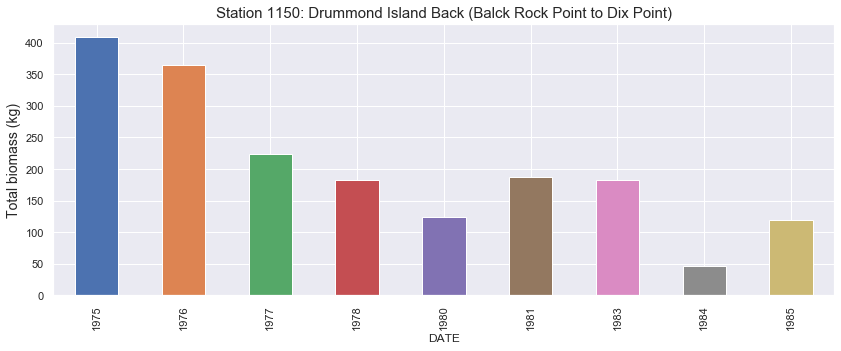

Elments in the time series at Sturgeon Point: 25


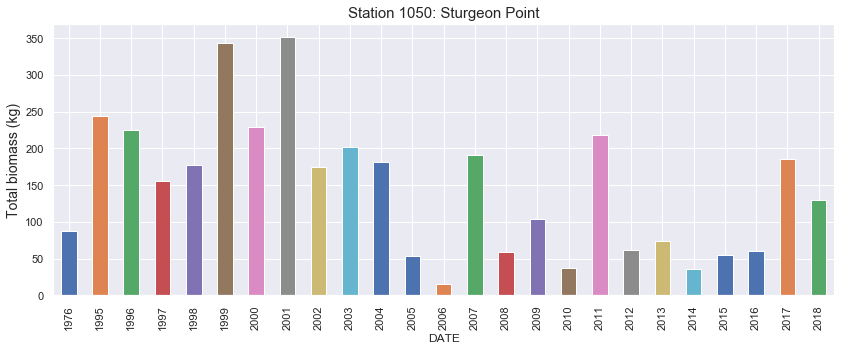

Elments in the time series at Presque Isle: 25


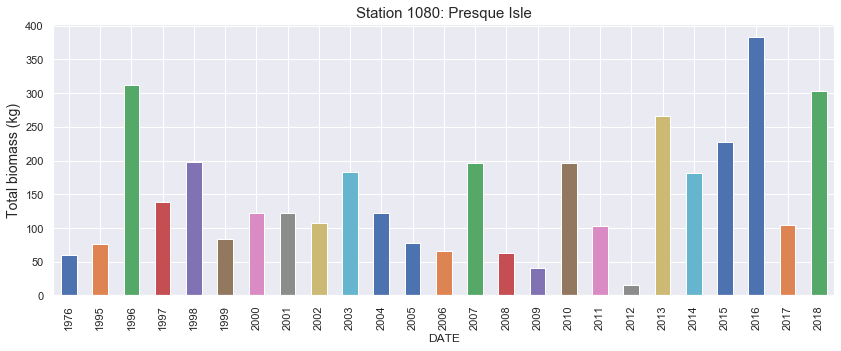

Elments in the time series at Thunder Bay South Point: 26


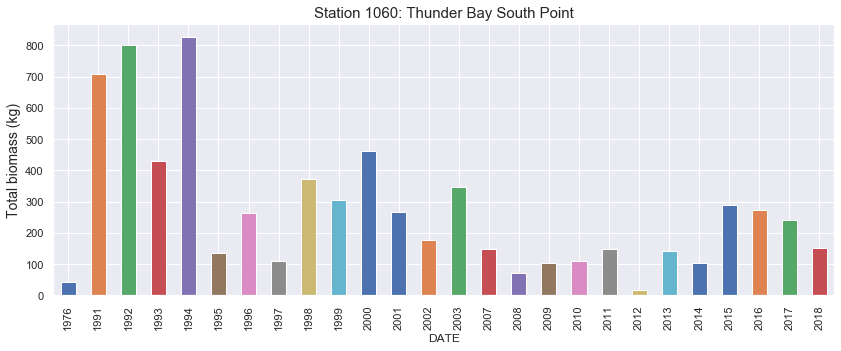

Elments in the time series at AuSable Point: 42


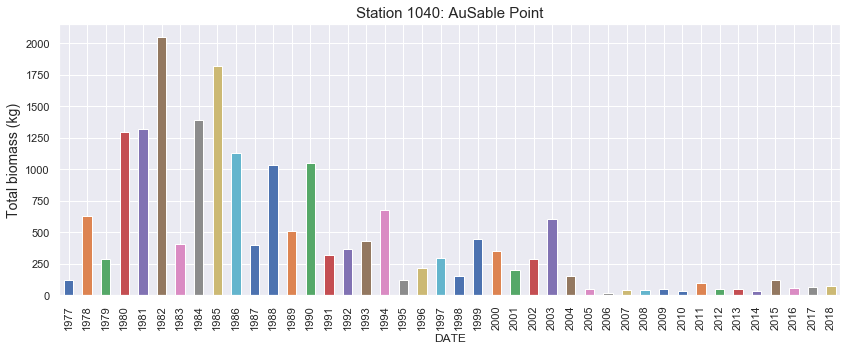

Elments in the time series at Boot Island to Marquette Island: 9


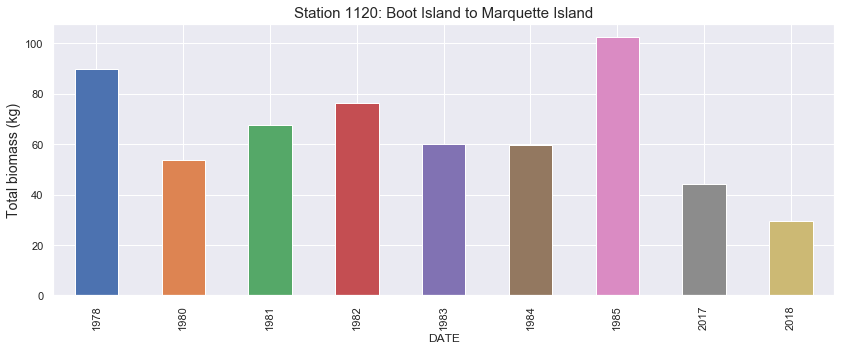

Elments in the time series at Port Sanilac: 9


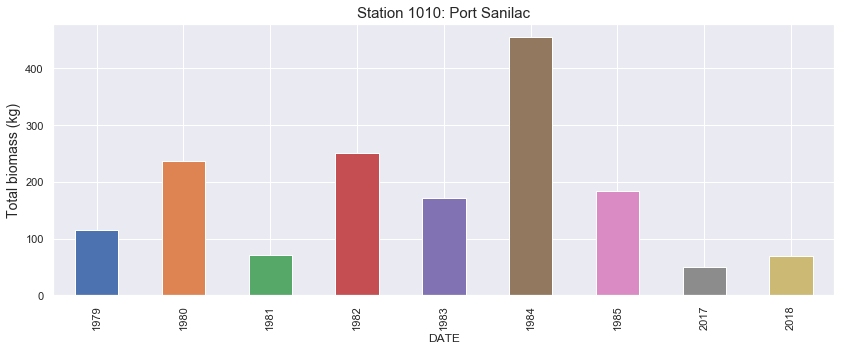

Elments in the time series at Grind Stone City to Lighthouse County Park: 33


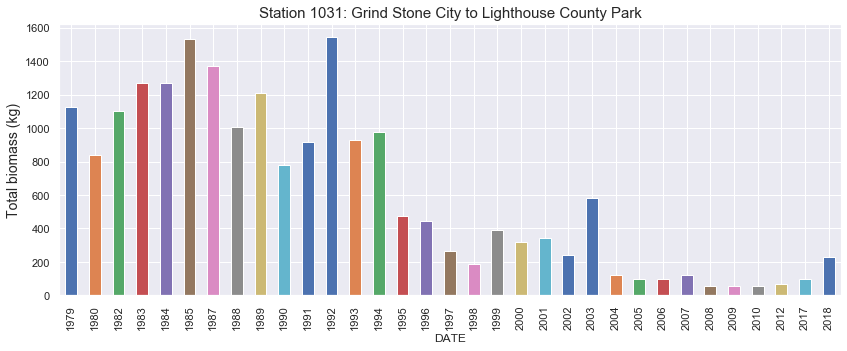

Elments in the time series at Port Austin: 6


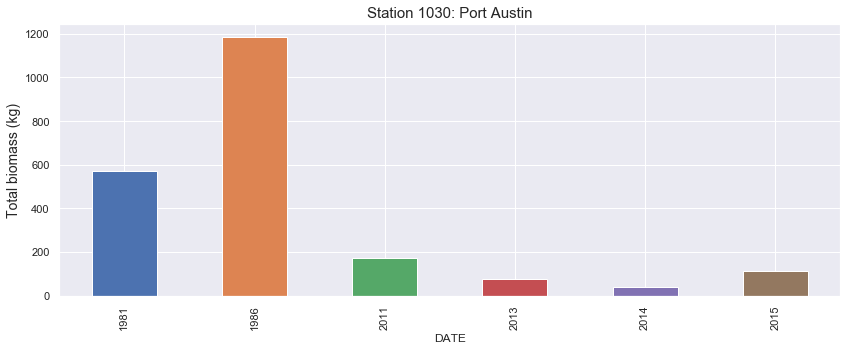

Elments in the time series at Nordmeer Wreck South East: 15


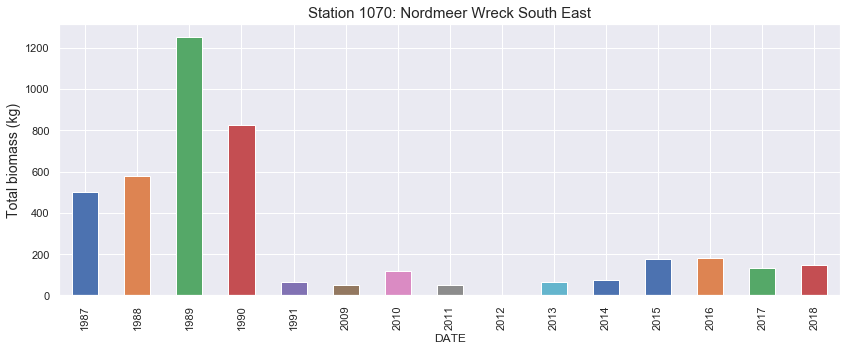

Elments in the time series at Thunder Bay Grass Island: 1


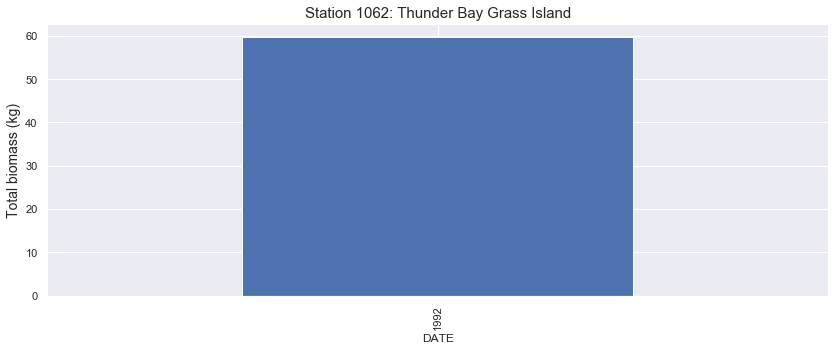

Elments in the time series at Harbor Beach South (Sucker Creek): 21


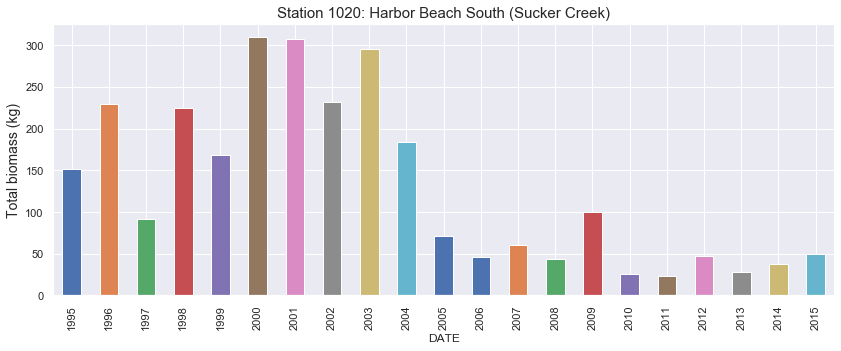

Elments in the time series at Harbor Beach North (Hardwood Point): 23


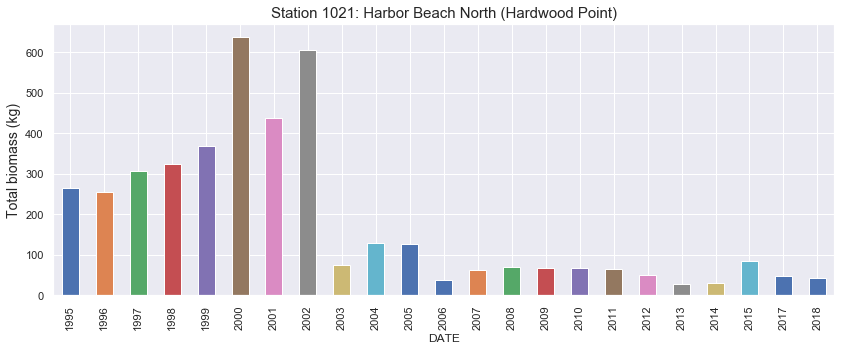

Elments in the time series at Rogers City to Adams Point: 22


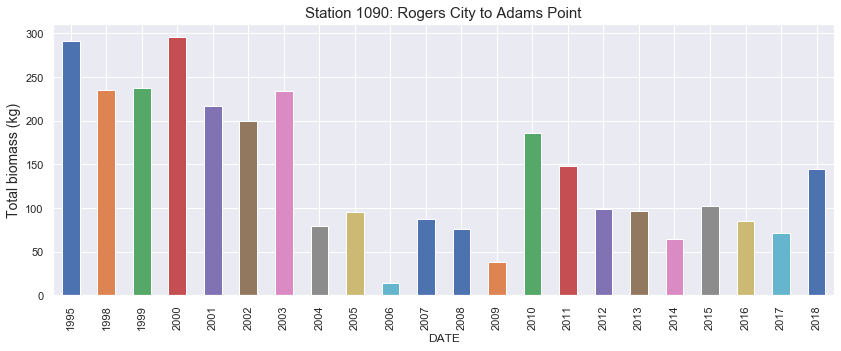

Elments in the time series at Nordmeer Wreck North: 14


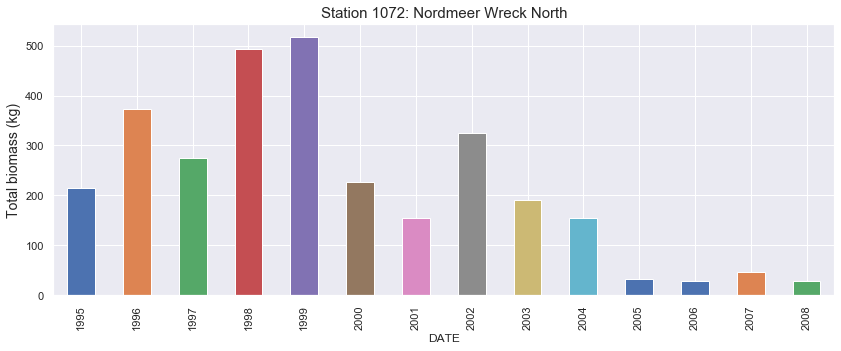

Elments in the time series at Rogers City to Hoeft Park: 2


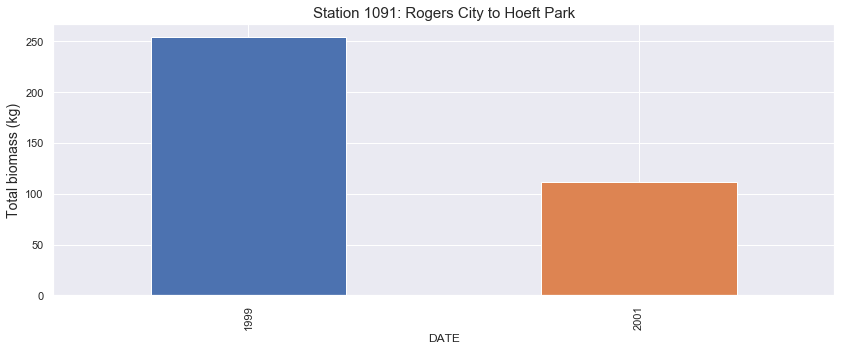

Elments in the time series at Spectacle Reef: 6


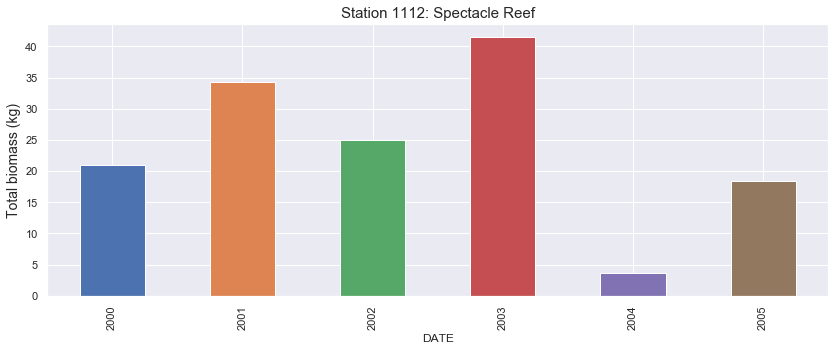

Elments in the time series at Thunder Bay North Point: 3


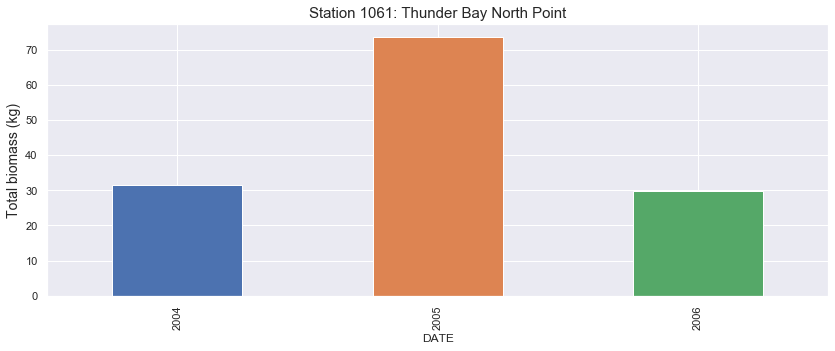

Elments in the time series at Raynolds Reef: 4


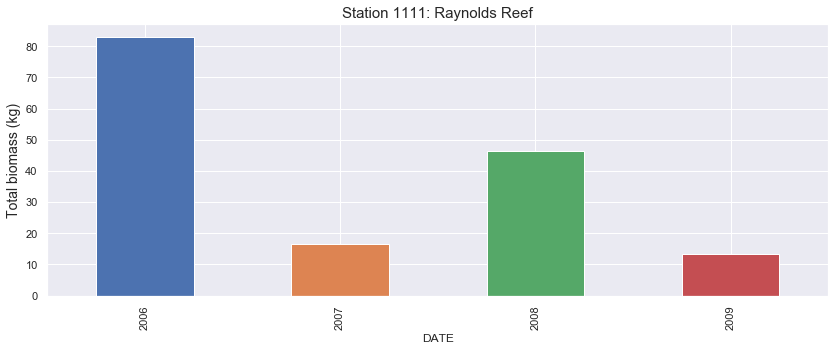

Elments in the time series at Drummond Island East (Big Shoal): 6


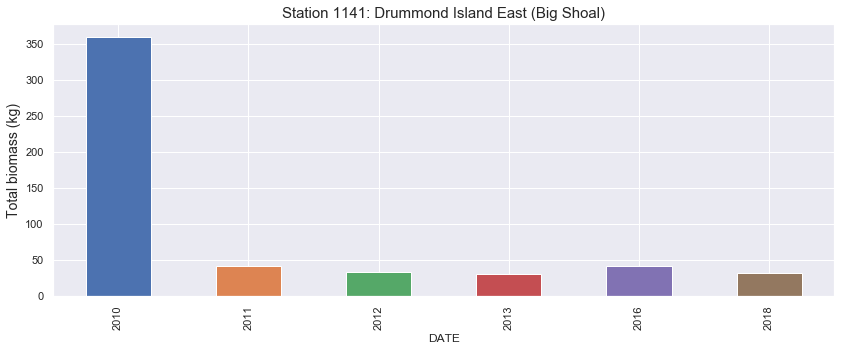

Elments in the time series at Drummond Island West (Gravel Island): 7


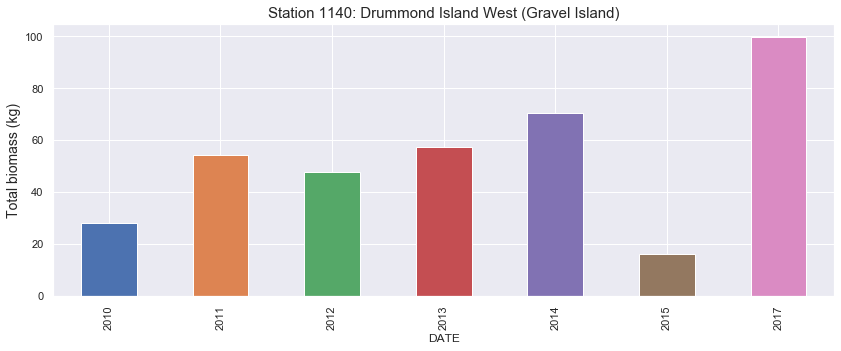

Elments in the time series at Detour West (St. Vital Point): 9


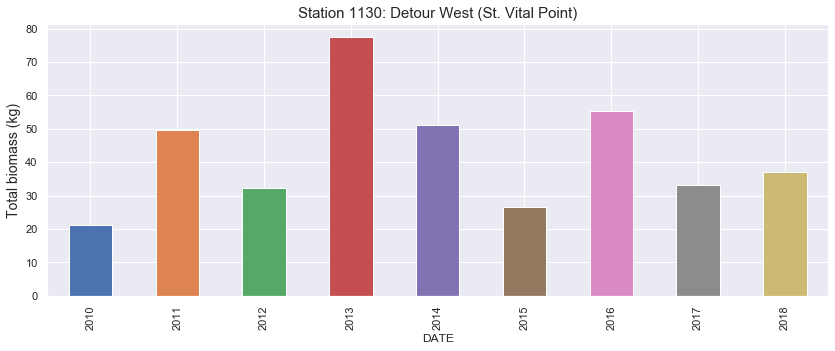

Elments in the time series at Goose Island to MRB Islands: 2


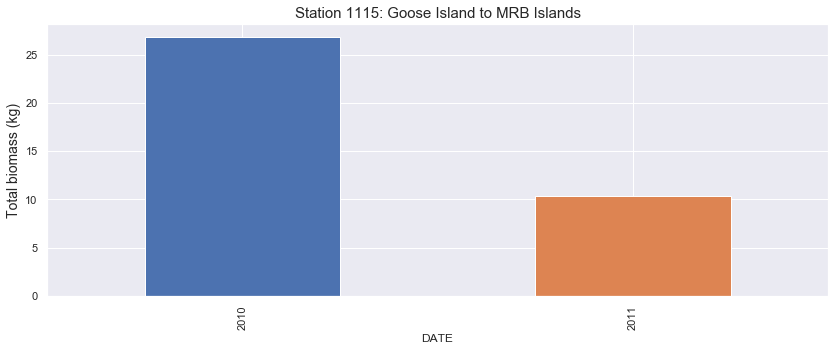

Elments in the time series at Harrisville: 2


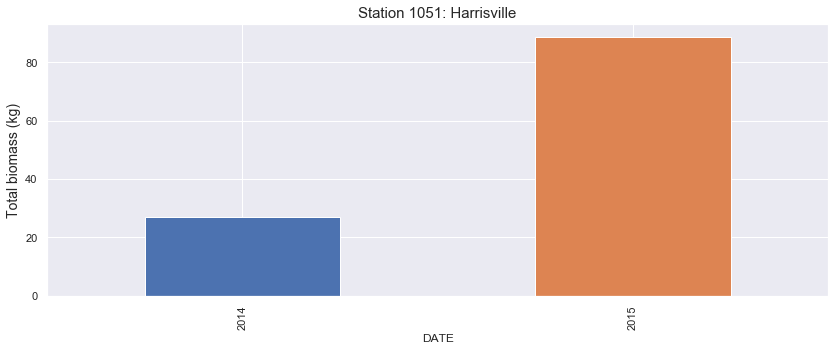

Elments in the time series at Rogers City Adams Point Reef: 1


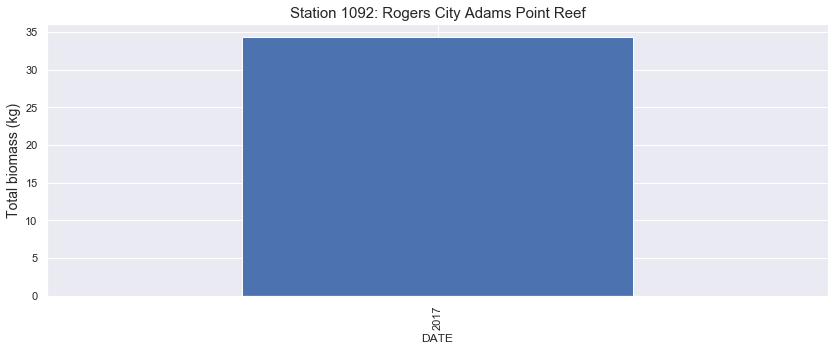

In [68]:
for stn_number in stations:
    station_wise_plot(stn_number)

In [69]:
df_nearshore_station_wise_species.head()

SPECIES,109,127,203,212,307,404
STATION,,,,,,
1010,2.67,109.922001,36.171000,24.11,985.740,NaN
1020,0.09,81.540000,145.780000,26.24,2278.850,0.520000
1021,0.06,362.393999,107.090000,17.40,3574.361,14.160000
1030,0.20,152.590000,166.240002,8.50,1670.390,12.530000
1031,3.48,911.583998,592.538999,87.51,17461.320,206.892002


In [70]:
list_locations_with_10_or_more_elements = [1110, 1100, 1114, 1050, 1080, 1060, 1040, 1031, 1070, 1090, 1072, 1021, 1020]

In [71]:
df_nearshore_station_wise_species = df_nearshore_station_wise_species.loc[list_locations_with_10_or_more_elements,:]

In [72]:
df_nearshore_station_wise_species = df_nearshore_station_wise_species.fillna(0)

### correlation coeffiecients among dominant species

In [73]:
df_nearshore_station_wise_species.corr()

SPECIES,109,127,203,212,307,404
SPECIES,,,,,,
109,1.000000,-0.445053,0.459620,0.754748,0.074524,0.612337
127,-0.445053,1.000000,-0.085428,-0.258407,0.330651,-0.141043
203,0.459620,-0.085428,1.000000,0.766390,0.641958,0.173781
212,0.754748,-0.258407,0.766390,1.000000,0.390611,0.718630
307,0.074524,0.330651,0.641958,0.390611,1.000000,0.168849
404,0.612337,-0.141043,0.173781,0.718630,0.168849,1.000000


### Visualize relationship among speies by pairplot

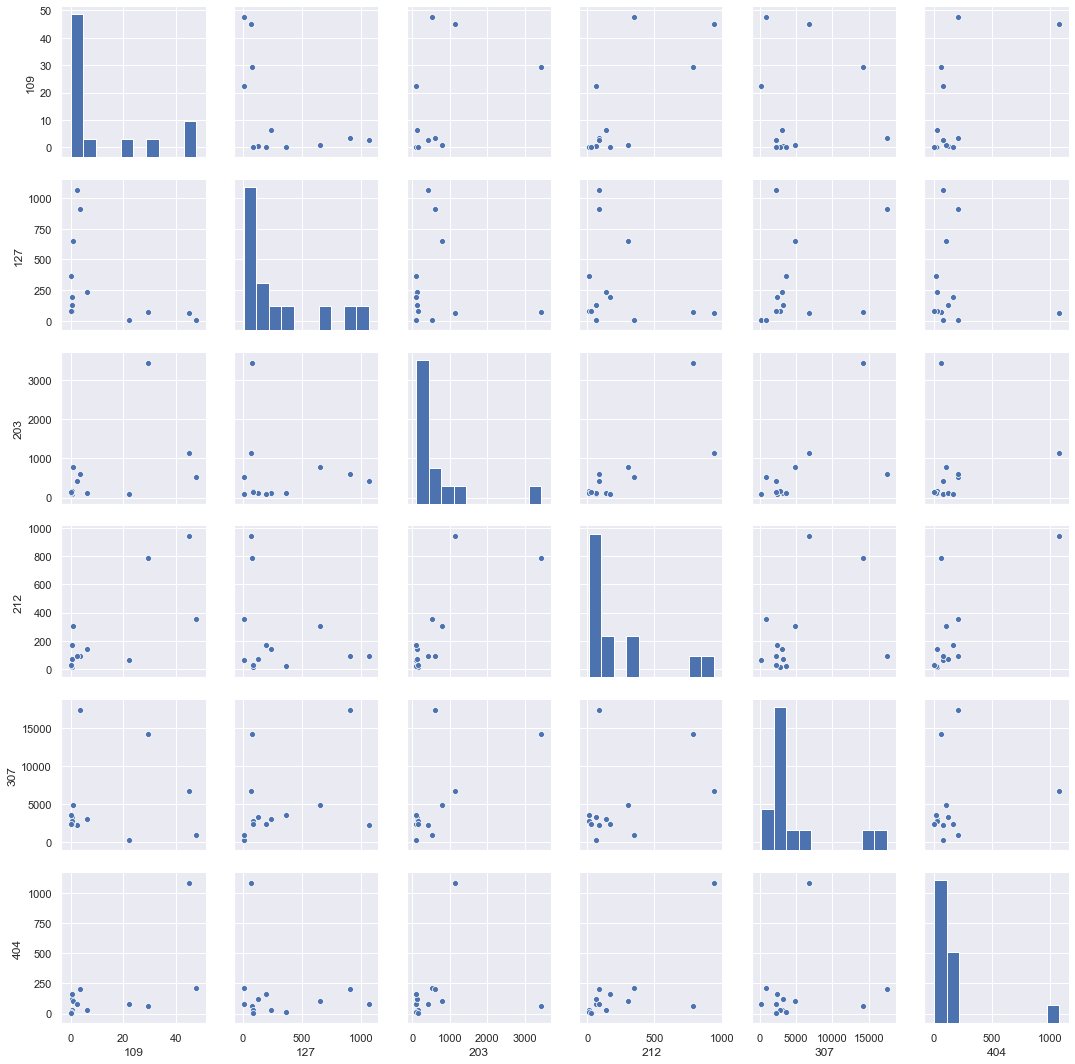

In [74]:
sns.pairplot(df_nearshore_station_wise_species)
plt.show()

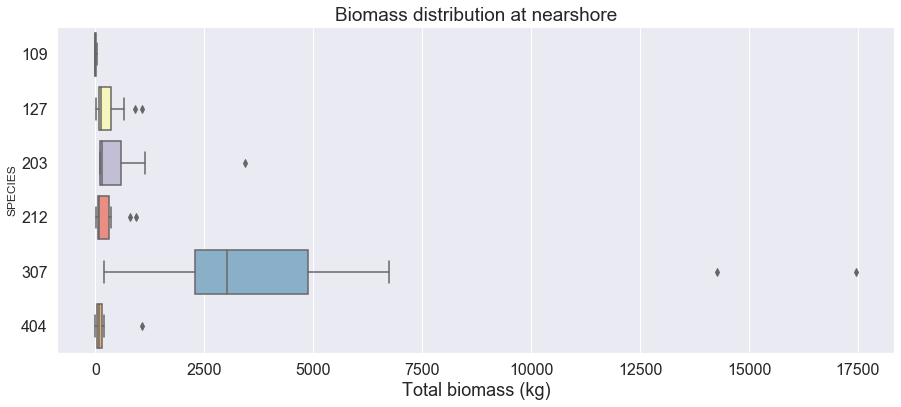

In [75]:
sns.set()
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.tick_params(labelsize=16)

sns.boxplot(data=df_nearshore_station_wise_species,  orient='h', palette='Set3',  ax=ax1) # palette='Set3',
# plt.yscale('log')
plt.xlabel("Total biomass (kg)", fontsize=18)
plt.title('Biomass distribution at nearshore', fontsize=19)
plt.show()

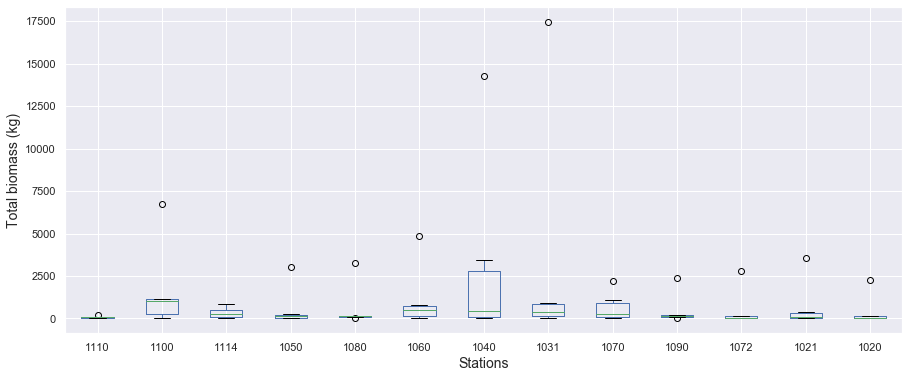

In [76]:
df_nearshore_station_wise_species.index = df_nearshore_station_wise_species.index.map(str)
tdf = df_nearshore_station_wise_species.T
tdf.boxplot(figsize=(15,6))
plt.ylabel('Total biomass (kg)', fontsize=14)
plt.xlabel("Stations", fontsize=14)
plt.show()

# Offshore analysis 

In [77]:
df_offshore.shape

(877, 16)

In [78]:
df_offshore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 18 to 4872
Data columns (total 16 columns):
SURVEY         877 non-null object
LiftID         877 non-null int64
DATE           877 non-null datetime64[ns]
Region         877 non-null object
STATION        877 non-null int64
LAT_DEG        867 non-null float64
LAT_MIN        849 non-null float64
LON_DEG        867 non-null float64
LON_MIN        849 non-null float64
SET_D1(ft)     877 non-null int64
SET_D2(ft)     877 non-null int64
NET_L(ft)      877 non-null int64
NET_CODE       877 non-null float64
SPECIES        877 non-null int64
totalN         877 non-null int64
totalW (kg)    867 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(7), object(2)
memory usage: 116.5+ KB


In [79]:
df_offshore[df_offshore['totalW (kg)'].isnull()]

,SURVEY,LiftID,DATE,Region,STATION,LAT_DEG,LAT_MIN,LON_DEG,LON_MIN,SET_D1(ft),SET_D2(ft),NET_L(ft),NET_CODE,SPECIES,totalN,totalW (kg)
1365,LT1,5039,1986-06-11,S,1040,44.0,19.900,83.0,12.700,127,148,9900,101.0,5,1,NaN
3340,LT1,2006139,2006-05-31,N,1100,45.0,38.470,84.0,9.800,115,129,900,101.0,212,1,NaN
3670,LT1,2010107,2010-04-20,N,1070,45.0,7.220,83.0,5.750,108,127,1800,101.0,212,1,NaN
3682,LT1,2010111,2010-04-22,N,1080,45.0,20.200,83.0,25.540,129,143,1800,101.0,404,1,NaN
3693,LT1,2010116,2010-04-28,N,1090,45.0,27.650,83.0,42.410,156,196,1800,101.0,5,1,NaN
3762,LT1,2010144,2010-05-20,S,1040,44.0,18.180,83.0,9.440,164,167,1800,101.0,204,1,NaN
3787,LT1,2010156,2010-05-26,S,1031,44.0,8.090,82.0,48.190,155,158,1800,101.0,204,1,NaN
3982,LT1,2012124,2012-05-08,N,1090,45.0,27.630,83.0,42.420,150,191,1800,101.0,127,1,NaN
4106,LT1,2013116,2013-05-06,N,1090,45.0,27.650,83.0,42.430,152,193,1800,101.0,127,1,NaN
4801,LT1,2018131,2018-05-21,N,1080,45.0,20.257,83.0,25.783,122,149,1800,101.0,404,1,NaN


In [80]:
df_offshore_v1 = df_offshore.dropna(subset=['totalW (kg)'], axis=0)

In [81]:
df_offshore_v1.shape

(867, 16)

In [82]:
offshore_stations = df_offshore_v1.STATION.unique()

In [83]:
offshore_stations

array([1110, 1040, 1031, 1120, 1030, 1060, 1050, 1021, 1020, 1061, 1072,
       1080, 1090, 1100, 1112, 1114, 1111, 1070, 1141, 1140, 1130, 1115,
       1051, 1010, 1092], dtype=int64)

### At offshore we have 25 stations, while at nearshore we have 31 stations 

In [84]:
df_offshore_v1.STATION.nunique()

25

### At offshore we have 18 species, while at nearshore we have 43 species

In [85]:
df_offshore_v1.SPECIES.nunique()

18

In [86]:
offshore_species= df_offshore_v1.SPECIES.unique()

In [87]:
offshore_species = np.sort(offshore_species)
print(offshore_species)

[  5 106 109 127 202 203 204 212 213 301 307 325 404 405 801 803 901 904]


### Plot station-wise biomass time series: for offshore

In [88]:
def station_wise_plot_1(station_number=None):
    df_name = "df_offshore_" + str(station_number)
    df_name = df_offshore_v1[df_offshore_v1.STATION==station_number]
    grpby_year = df_name.groupby(df_name.DATE.dt.year)
    year_count = grpby_year['totalW (kg)'].size().count()
    
    location_series = df_location_name[df_location_name.code==station_number].LOCATION.reset_index() 
    print("Elments in the time series at "  + location_series['LOCATION'][0] + ": " + str(year_count))
    
    grpby_year['totalW (kg)'].sum().plot(kind='bar', figsize=(14,5))
    
    plt.ylabel('Total biomass (kg)', fontsize=14)
    plt.title("Station " + str(station_number) + ": " + location_series['LOCATION'][0], fontsize=15)
    plt.grid(True)
    plt.show()

Elments in the time series at Mackinaw City to MRB Islands: 7


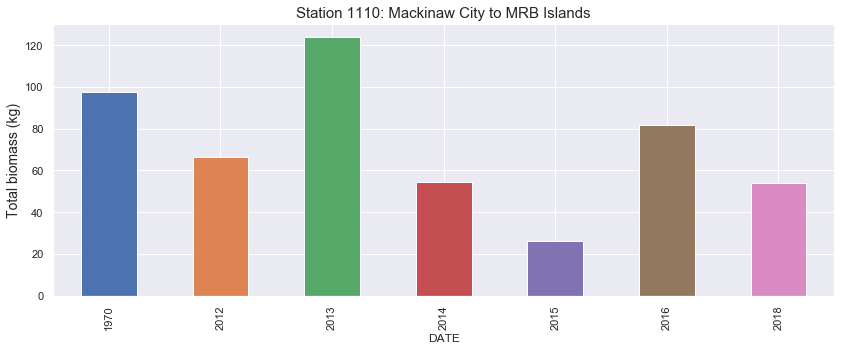

Elments in the time series at AuSable Point: 29


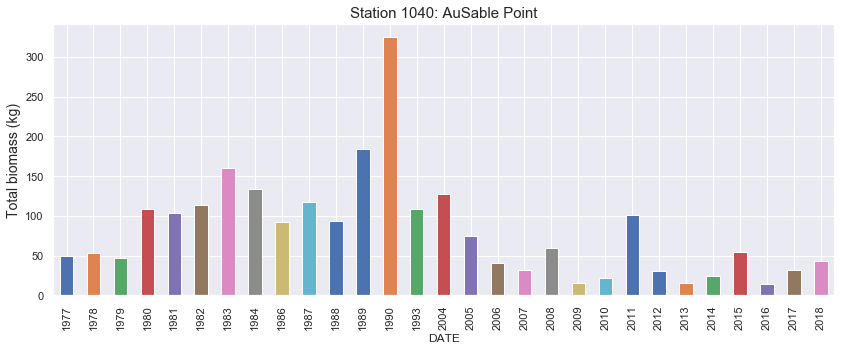

Elments in the time series at Grind Stone City to Lighthouse County Park: 18


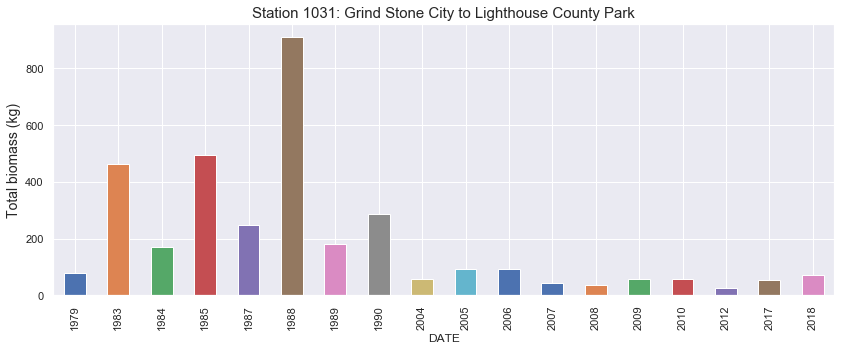

Elments in the time series at Boot Island to Marquette Island: 7


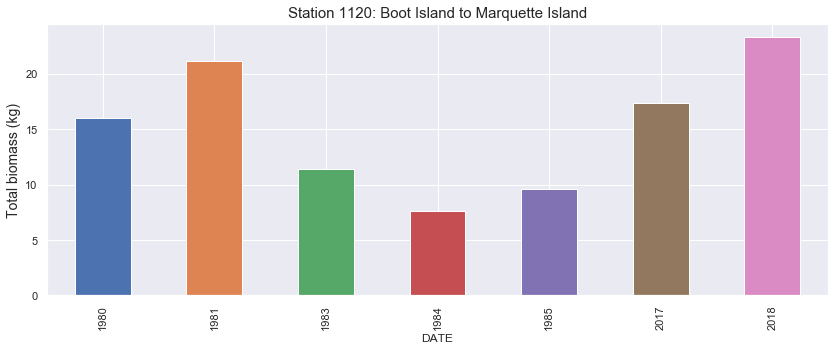

Elments in the time series at Port Austin: 5


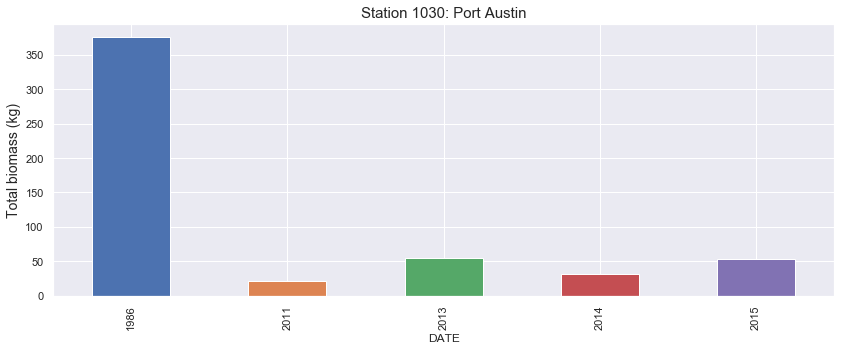

Elments in the time series at Thunder Bay South Point: 13


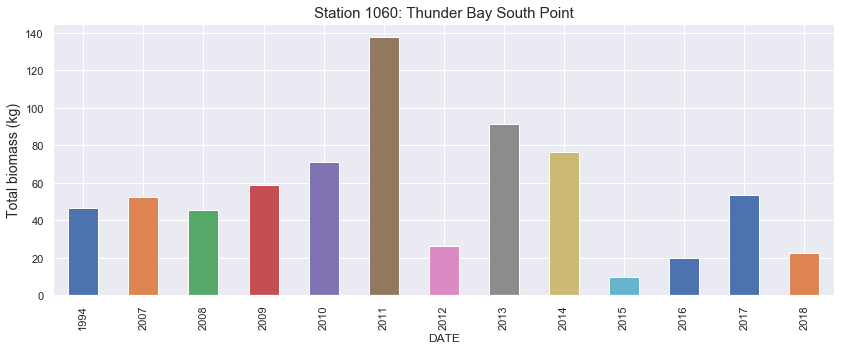

Elments in the time series at Sturgeon Point: 15


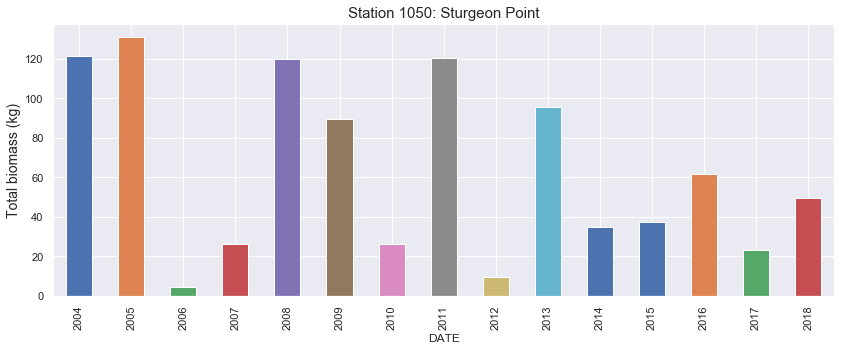

Elments in the time series at Harbor Beach North (Hardwood Point): 14


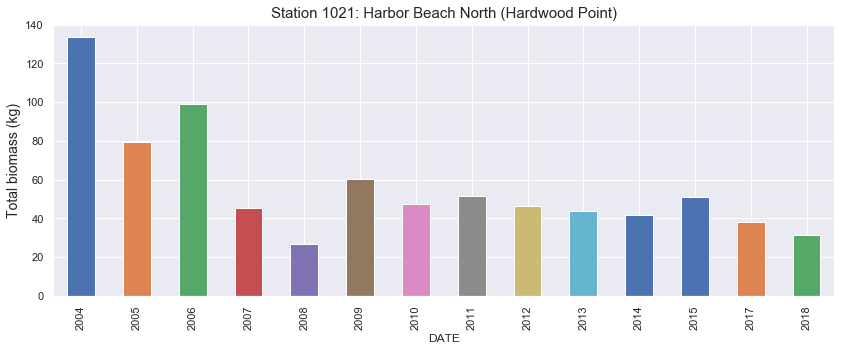

Elments in the time series at Harbor Beach South (Sucker Creek): 12


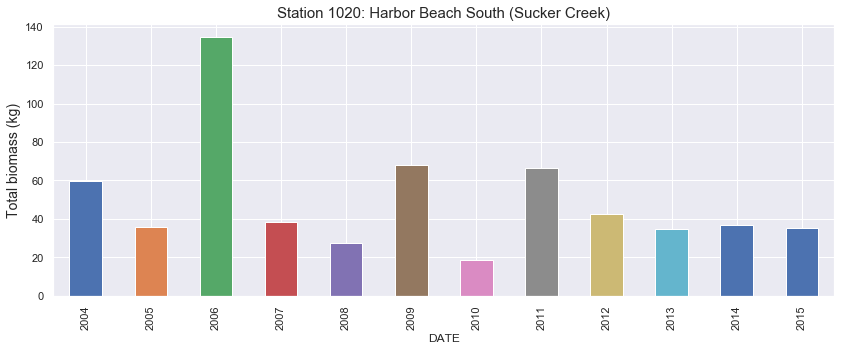

Elments in the time series at Thunder Bay North Point: 3


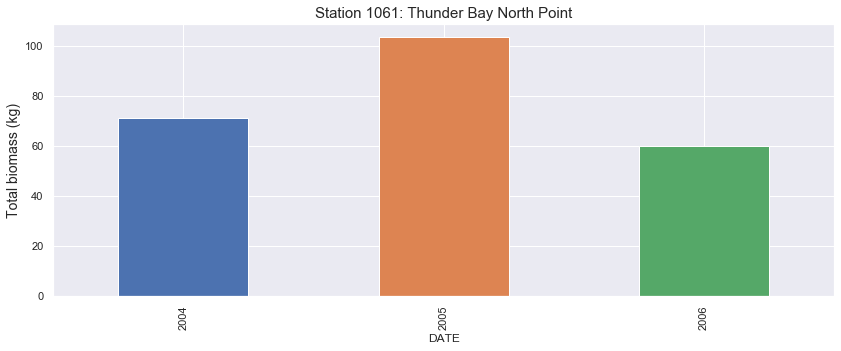

Elments in the time series at Nordmeer Wreck North: 5


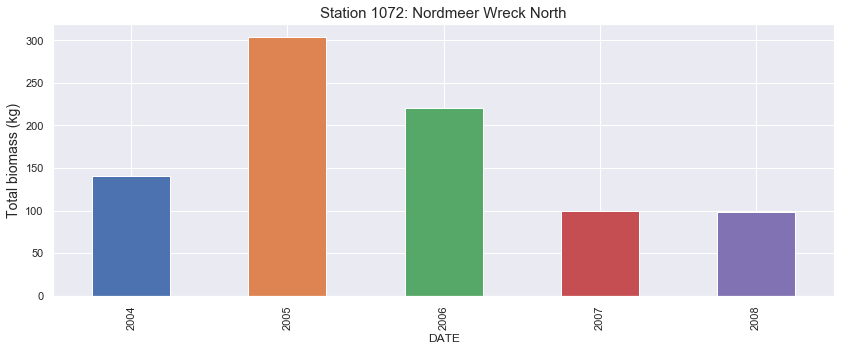

Elments in the time series at Presque Isle: 15


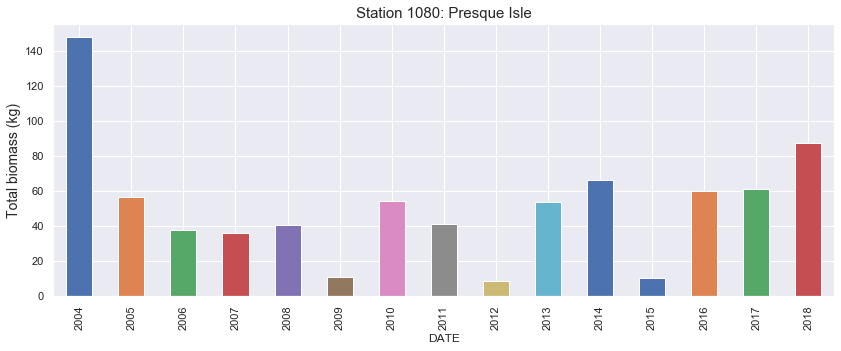

Elments in the time series at Rogers City to Adams Point: 15


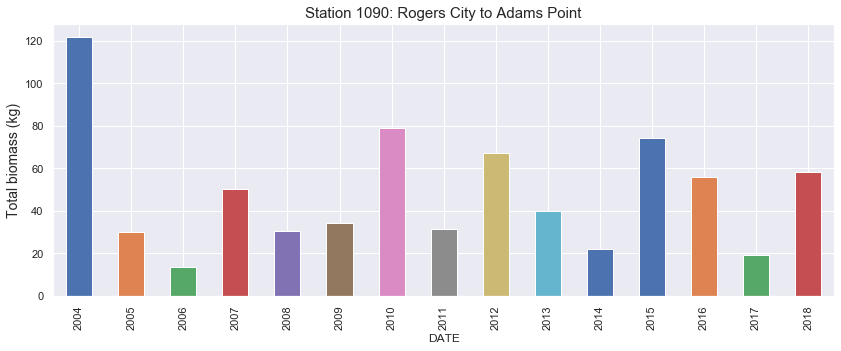

Elments in the time series at Hammond Bay to Nine Miles Point: 15


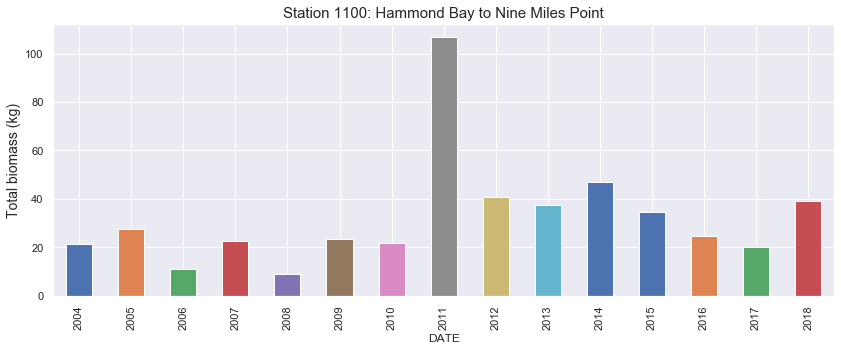

Elments in the time series at Spectacle Reef: 2


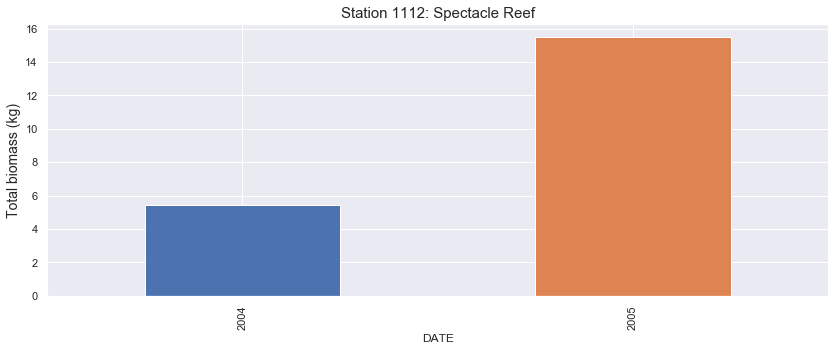

Elments in the time series at Rabbit Back Point and St. Ignace to Mackinac Island: 5


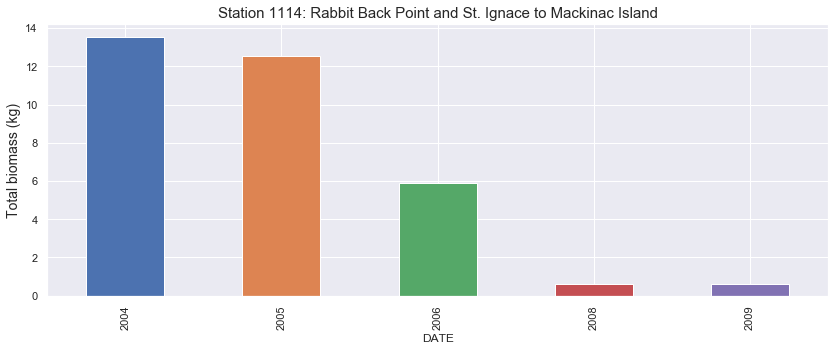

Elments in the time series at Raynolds Reef: 3


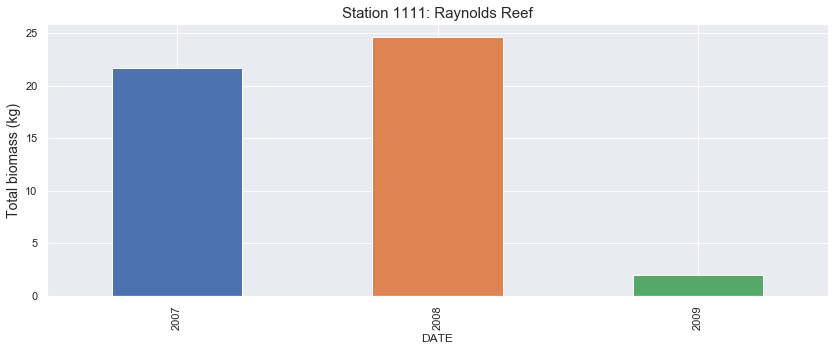

Elments in the time series at Nordmeer Wreck South East: 10


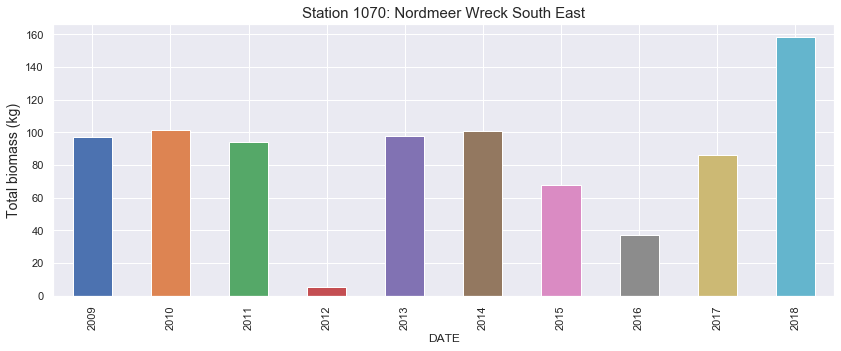

Elments in the time series at Drummond Island East (Big Shoal): 6


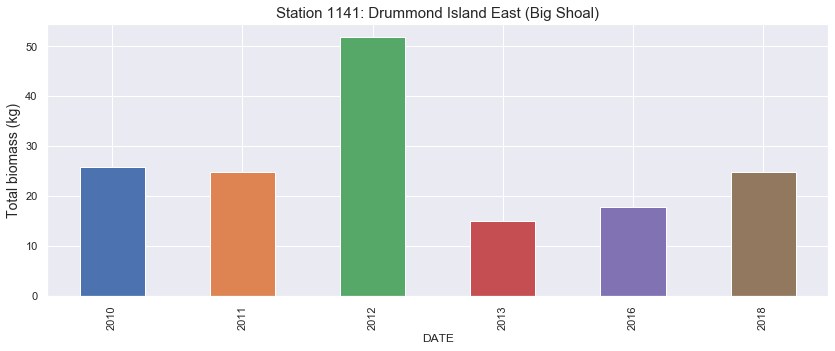

Elments in the time series at Drummond Island West (Gravel Island): 7


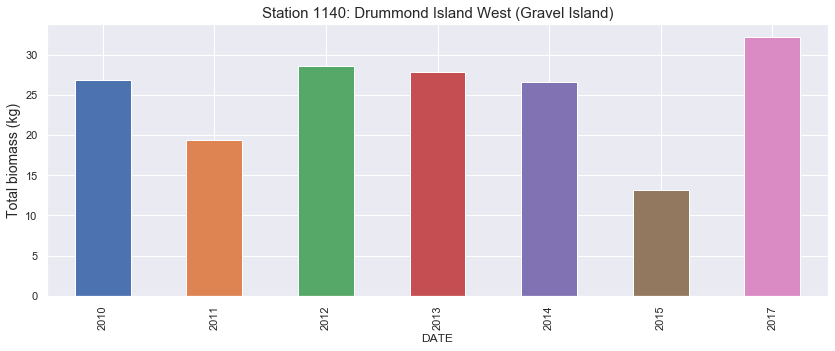

Elments in the time series at Detour West (St. Vital Point): 9


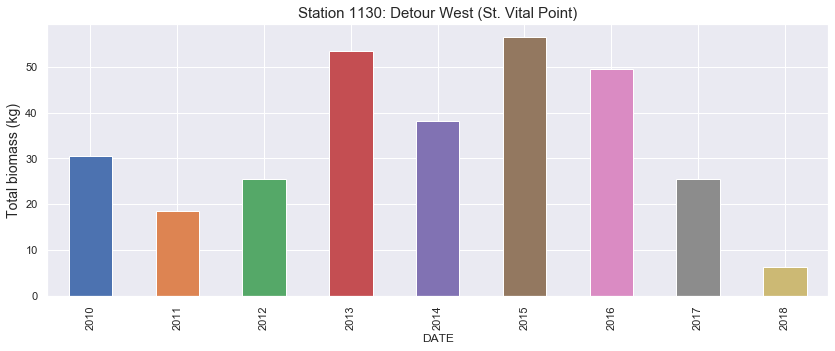

Elments in the time series at Goose Island to MRB Islands: 2


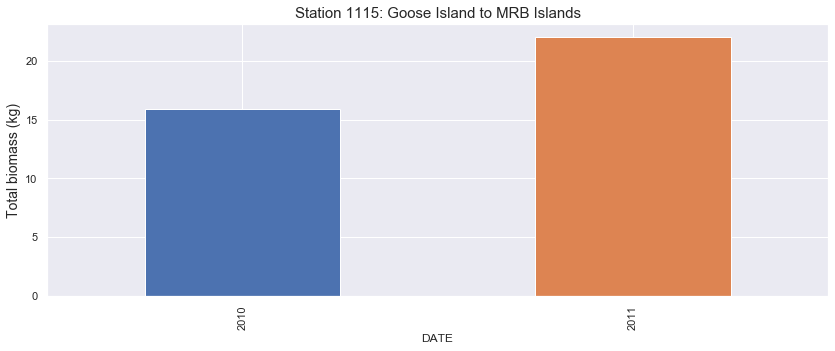

Elments in the time series at Harrisville: 2


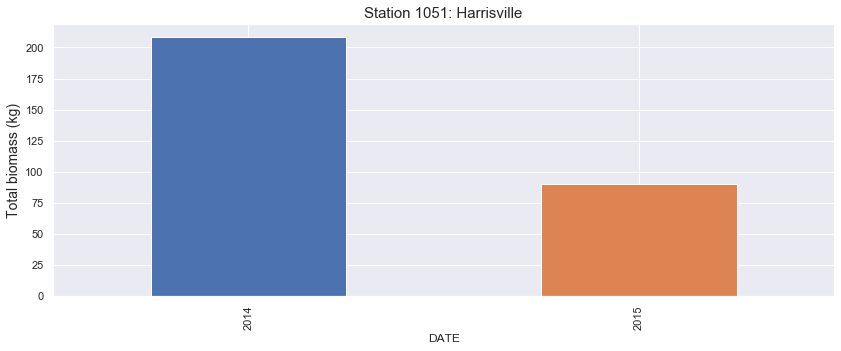

Elments in the time series at Port Sanilac: 2


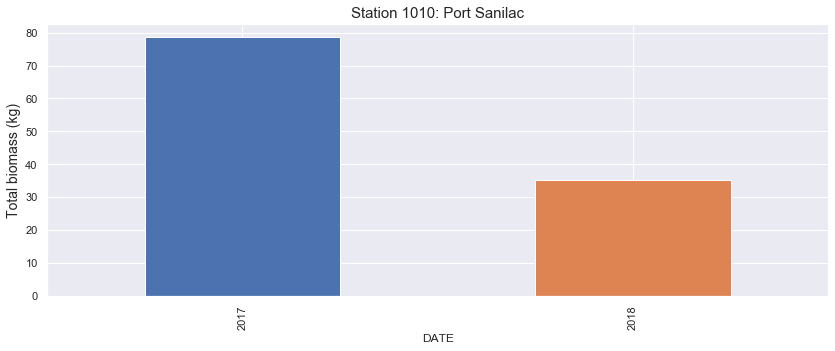

Elments in the time series at Rogers City Adams Point Reef: 1


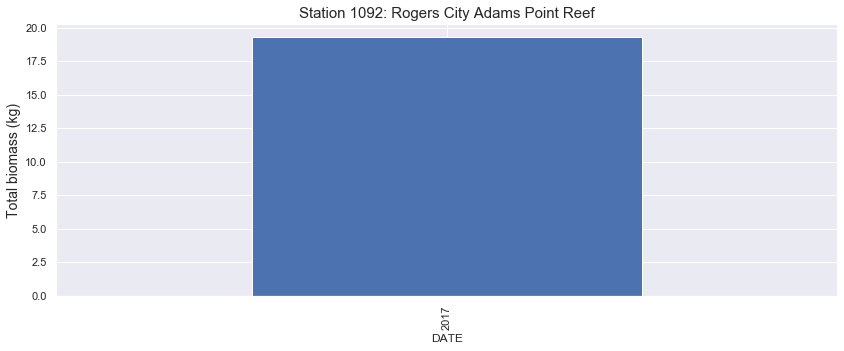

In [89]:
for stn_number in offshore_stations:
    station_wise_plot_1(stn_number)

## Offshore species-wise analysis 

In [90]:
offshore_grpby_station = df_offshore_v1.groupby(['STATION', 'SPECIES'])
series_offshore_grpby_station = offshore_grpby_station['totalW (kg)'].sum(axis=1)
series_offshore_grpby_station.head(10)

STATION  SPECIES
1010     203         13.922
         307        100.098
1020     127          4.150
         203         68.280
         307        525.550
1021     127          1.420
         203         54.796
         307        739.337
1030     106          5.000
         109          1.300
Name: totalW (kg), dtype: float64

In [91]:
df_offshore_grpby_station = series_offshore_grpby_station.unstack()

In [92]:
df_offshore_grpby_station.head(7)

SPECIES,5,106,109,127,202,203,204,212,213,301,307,325,404,405,801,803,901,904
STATION,,,,,,,,,,,,,,,,,,
1010,NaN,NaN,NaN,NaN,NaN,13.922000,NaN,NaN,NaN,NaN,100.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,4.150000,NaN,68.280000,NaN,NaN,NaN,NaN,525.550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,1.420000,NaN,54.796000,NaN,NaN,NaN,NaN,739.337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,NaN,5.000000,1.3,28.790000,NaN,177.159998,NaN,NaN,19.400000,15.55,286.460,NaN,NaN,NaN,0.6,1.70,NaN,0.1
1031,0.04,61.150001,14.8,173.449998,NaN,1064.297992,NaN,7.70,172.599997,29.02,1863.050,NaN,15.5,8.1,14.0,4.81,NaN,NaN
1040,NaN,15.380000,17.3,39.870000,0.7,558.844002,NaN,9.86,107.394998,46.43,1585.351,0.55,NaN,NaN,0.4,NaN,NaN,NaN
1050,NaN,NaN,NaN,1.928000,NaN,47.248000,NaN,NaN,NaN,NaN,901.499,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_offshore_grpby_station.describe()

SPECIES,5,106,109,127,202,203,204,212,213,301,307,325,404,405,801,803,901,904
count,1.00,6.000000,5.000000,21.000000,3.000000,23.000000,2.000000,11.000000,6.000000,7.000000,25.000000,1.00,4.000000,1.0,4.000000,2.000000,1.00,1.0
mean,0.04,14.351667,15.220000,17.118619,0.620333,97.876133,0.415000,2.766455,60.239666,15.620000,473.025532,0.55,5.075750,8.1,3.792000,3.255000,0.45,0.1
std,NaN,23.587545,14.988227,37.049301,0.494338,240.987083,0.049497,3.171535,67.353366,16.788829,480.423302,NaN,7.027117,NaN,6.807622,2.199102,NaN,NaN
min,0.04,0.100000,1.300000,1.000000,0.091000,0.530000,0.380000,0.480000,2.800000,1.410000,18.784000,0.55,0.480000,8.1,0.168000,1.700000,0.45,0.1
25%,0.04,1.320000,3.670000,2.830000,0.395500,7.763500,0.397500,0.511000,10.364750,2.440000,100.098000,0.55,1.120500,8.1,0.342000,2.477500,0.45,0.1
50%,0.04,4.540000,14.800000,7.276000,0.700000,13.922000,0.415000,2.260000,35.645000,12.050000,286.460000,0.55,2.161500,8.1,0.500000,3.255000,0.45,0.1
75%,0.04,12.785000,17.300000,11.012000,0.885000,56.944500,0.432500,2.804500,93.518749,22.285000,739.337000,0.55,6.116750,8.1,3.950000,4.032500,0.45,0.1
max,0.04,61.150001,39.030000,173.449998,1.070000,1064.297992,0.450000,9.860000,172.599997,46.430000,1863.050000,0.55,15.500000,8.1,14.000000,4.810000,0.45,0.1


In [94]:
df_fish_name.loc[df_fish_name.Code.isin(df_offshore_v1.SPECIES.unique())]

,Code,total N,BRIEF,NAME
0,307,44169,LAT,Lake trout
1,203,12100,LWF,Lake whitefish
2,109,10589,smelt,Rainbow smelt
3,212,9132,Rou,Round whitefish
4,213,8344,CHB,Unid. chubs
5,404,6862,LNS,Longnose sucker
6,801,5059,YCP,Yellow perch
7,106,4615,ALE,Alewife
8,127,3872,BBT,Burbot
9,202,2522,CSC,Cisco


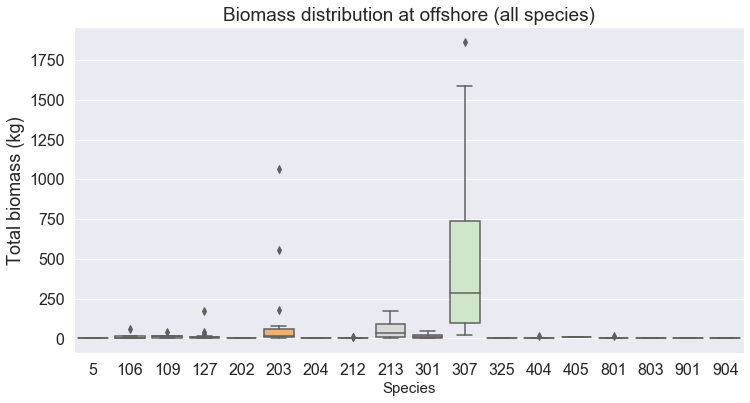

In [95]:
sns.set()
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.tick_params(labelsize=16)

sns.boxplot(data=df_offshore_grpby_station,  orient='v', palette='Set3',  ax=ax1) # palette='Set3',
# plt.yscale('log')
plt.ylabel("Total biomass (kg)", fontsize=18)
plt.xlabel("Species", fontsize=15)
plt.title('Biomass distribution at offshore (all species)', fontsize=19)
plt.show()

### <font color="blue"> Compare nearshore and offshore species

In [96]:
list_common_species = [109, 127, 203, 212, 213, 307, 404] 

<font color="blue"> Melt: df_nearshore

In [97]:
df_nearshore_common_species = df_nearshore_grpby_station[list_common_species]
df_nearshore_melt = pd.melt(df_nearshore_common_species)
df_nearshore_melt['Shore']="Nearshore"
df_nearshore_melt.head()

,SPECIES,value,Shore
0,109,2.67,Nearshore
1,109,0.09,Nearshore
2,109,0.06,Nearshore
3,109,0.20,Nearshore
4,109,3.48,Nearshore


In [98]:
df_nearshore_melt.shape

(217, 3)

<font color="blue"> Melt: df_nearshore

In [99]:
df_offshore_common_species = df_offshore_grpby_station[list_common_species]
df_offshore_melt = pd.melt(df_offshore_common_species)
df_offshore_melt['Shore']="Offshore"
df_offshore_melt.head()

,SPECIES,value,Shore
0,109,NaN,Offshore
1,109,NaN,Offshore
2,109,NaN,Offshore
3,109,1.3,Offshore
4,109,14.8,Offshore


In [100]:
print(df_offshore_melt.shape)

(175, 3)


In [101]:
df_near_off_shore_comparison = pd.concat([df_nearshore_melt, df_offshore_melt],ignore_index=True)

In [102]:
df_near_off_shore_comparison.shape

(392, 3)

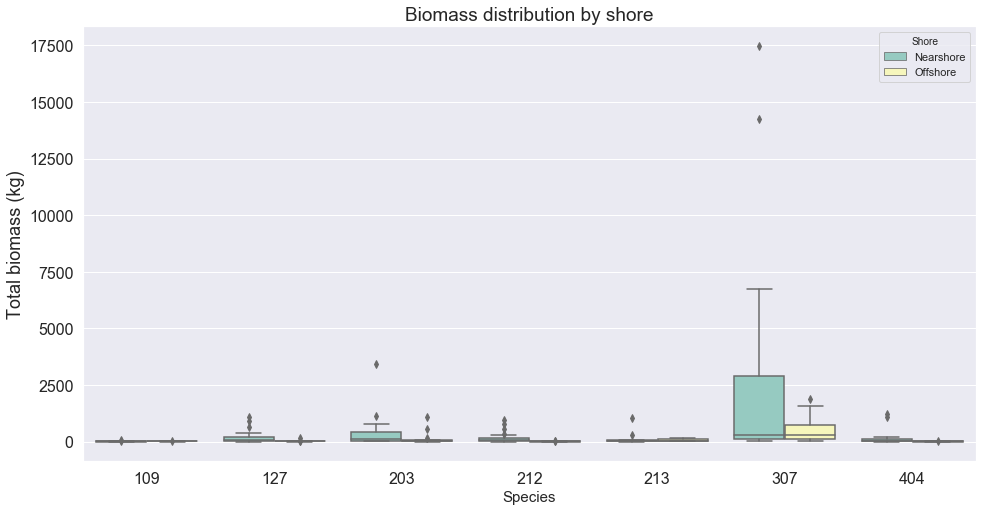

In [103]:
sns.set()
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.tick_params(labelsize=16)

sns.boxplot(x='SPECIES',y='value',data=df_near_off_shore_comparison, hue='Shore' , orient='v', palette='Set3',  ax=ax1) # palette='Set3',
# plt.yscale('log')
plt.ylabel("Total biomass (kg)", fontsize=18)
plt.xlabel("Species", fontsize=15)
plt.title('Biomass distribution by shore', fontsize=19)
plt.show()

In [104]:
# import numpy as np; np.random.seed(42)
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

# sns.boxplot(x="variable", y="value", data=pd.melt(df))

# plt.show()